## GROUP PROJECT: Euklid Case

Master's Degree in Data Science and Management 

Course: Machine Learning

Students: Gian Lorenzo Marchioni () - David Paquette () - Elena Tomasella (781321)


## DATASETS

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import missingno as msno

In [2]:
#import dataset
amazon_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Amazon_weekly.csv', sep = ',', header = 0)
cac_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Cac_weekly.csv', sep = ',', header = 0)
ibm_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/IBM_weekly.csv', sep = ',',header = 0)
microsoft_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Microsoft_weekly.csv', sep = ',', header = 0)
nasdaq_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Nasdaq_weekly.csv', sep = ',', header = 0)
sp500_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Sp500_weekly.csv', sep = ',', header=0)
dfs = [amazon_df, cac_df, ibm_df, microsoft_df, nasdaq_df, sp500_df]
dfs_names = ['Amazon', 'Cac', 'IBM', 'Microsoft', 'Nasdaq', 'sp500']

In [3]:
#conversion of Date values into datetime object
for df in dfs:
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

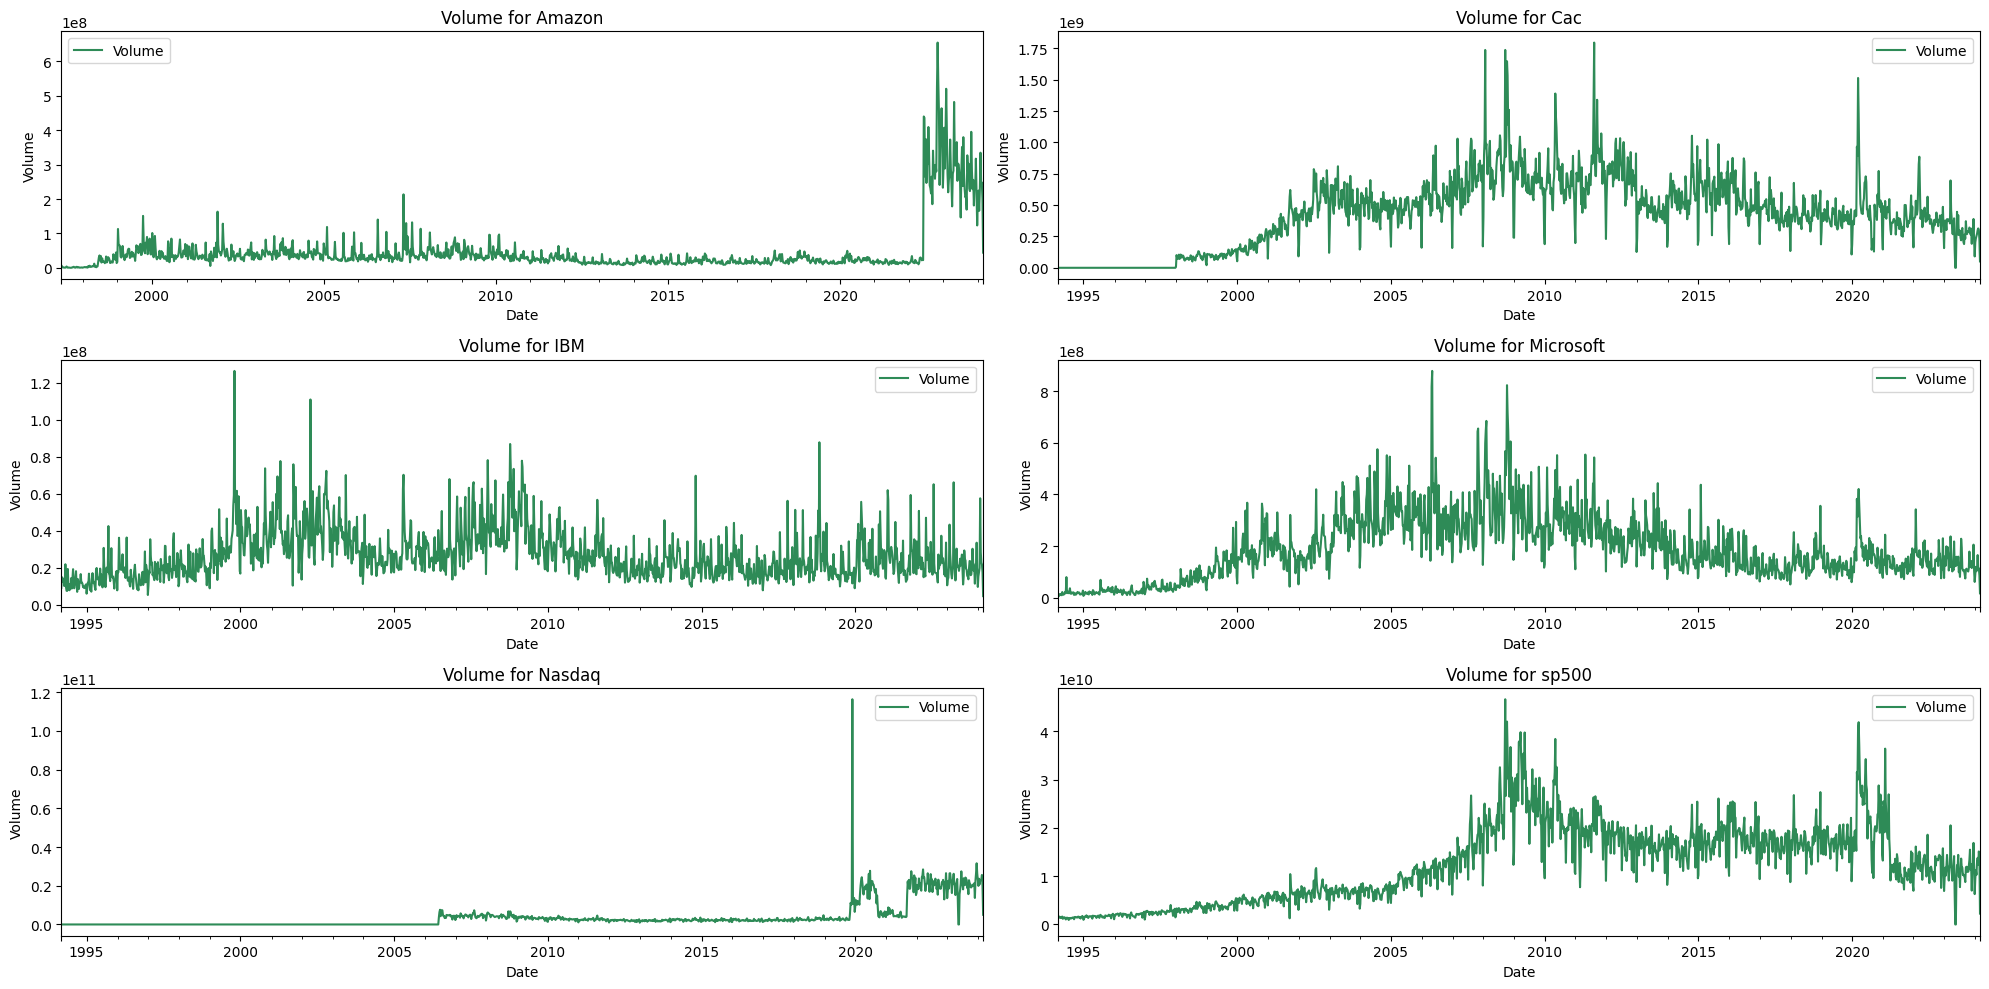

In [4]:
#volumes
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Volume', ax=axs[i, j], color = 'seagreen')
        axs[i, j].set_title(f'Volume for {dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Volume')

plt.tight_layout()
plt.show()

In [5]:
nasdaq_df[nasdaq_df.Volume !=0].head()

Date     Open     High      Low    Close      Volume
641 2006-06-18  2137.47  2147.91  2065.11  2129.95  3590464523
642 2006-06-25  2136.60  2152.56  2103.77  2121.47  6356132033
643 2006-07-02  2126.46  2183.48  2090.78  2172.09  7589173242
644 2006-07-09  2177.91  2190.44  2126.64  2130.06  4263156577
645 2006-07-16  2135.96  2142.36  2027.11  2037.35  6692935710

In [6]:
cac_df[cac_df.Volume !=0].head()

Date     Open     High      Low    Close       Volume
200 1998-01-04  2888.63  3048.00  2888.63  3040.14    6752690.0
201 1998-01-11  3023.43  3075.30  2902.13  2919.81  101046353.0
202 1998-01-18  2830.97  2976.85  2809.73  2976.09   78855452.0
203 1998-01-25  3004.86  3016.81  2944.29  2966.15   71560128.0
204 1998-02-01  2992.54  3173.98  2961.90  3172.14   86885992.0

Problem with Volumes:
- for nasdaq, it's 0 before 2006.
- for caa, it's 0 before 1998

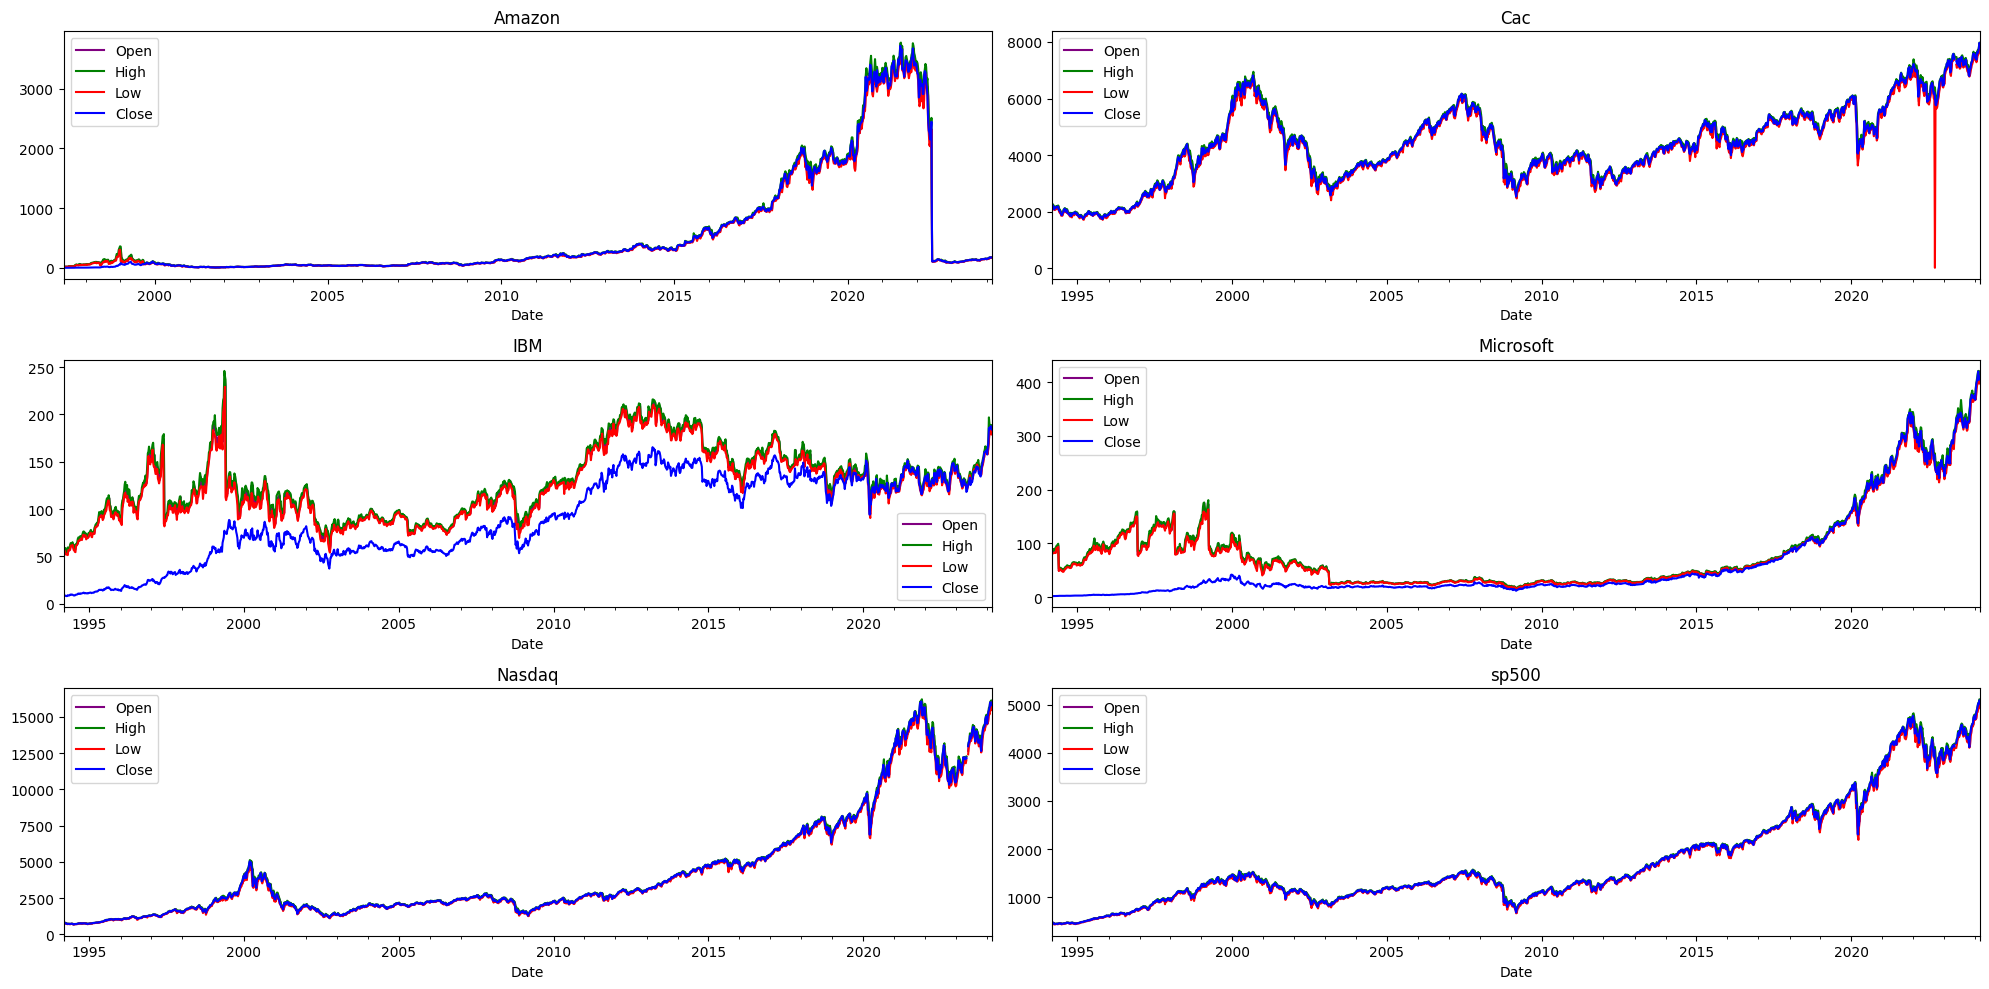

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

- Cac: on 2022-09-18 we had a problem with the 'Low'. We replace it from Yahoo finance.

In [8]:
#replacing the value for the lowest (nonsense) value for Cac on 2022-09-18
cac_df.loc[cac_df['Low']==cac_df['Low'].min(), 'Low'] = 6052.42

In [9]:
#fillna cac
cac_df[cac_df['Close'].isna()]

cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 7354.54
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 7523.56
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 7491.96
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 7443.38

cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] = 7197.40
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 7493.38
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 7319.18
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 7467.93

In [10]:
#fillna nasdaq
nasdaq_df[nasdaq_df['Close'].isna()]

nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 12174.06
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 12364.65
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 12284.74
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 12231.68

nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] = 12263.35
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 12731.73
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 12657.90
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 12301.17

In [11]:
#fillna sp500
sp500_df[sp500_df['Close'].isna()]

sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 4109.86
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 4212.91
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 4191.98
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 4126.65

sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] =4103.98
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 4212.87
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 4205.45
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 4190.78

In [12]:
#fillna amazon
amazon_df[amazon_df['Close'].isna()]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

In [13]:
#fillna ibm
ibm_df[ibm_df['Close'].isna()]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

In [14]:
#fillna microsoft
microsoft_df[microsoft_df['Close'].isna()]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

Amazon splits:
- 1998-06-02 2:1
- 1999-01-05 3:1
- 1999-09-05 2:1
- 2022-06-06 20:1

In [15]:
amazon_df.loc[amazon_df['Date']>=pd.to_datetime('2022-06-06'),['Open', 'High', 'Low', 'Close']] = amazon_df.loc[amazon_df['Date']>=pd.to_datetime('2022-06-06'),['Open', 'High', 'Low', 'Close']]*20

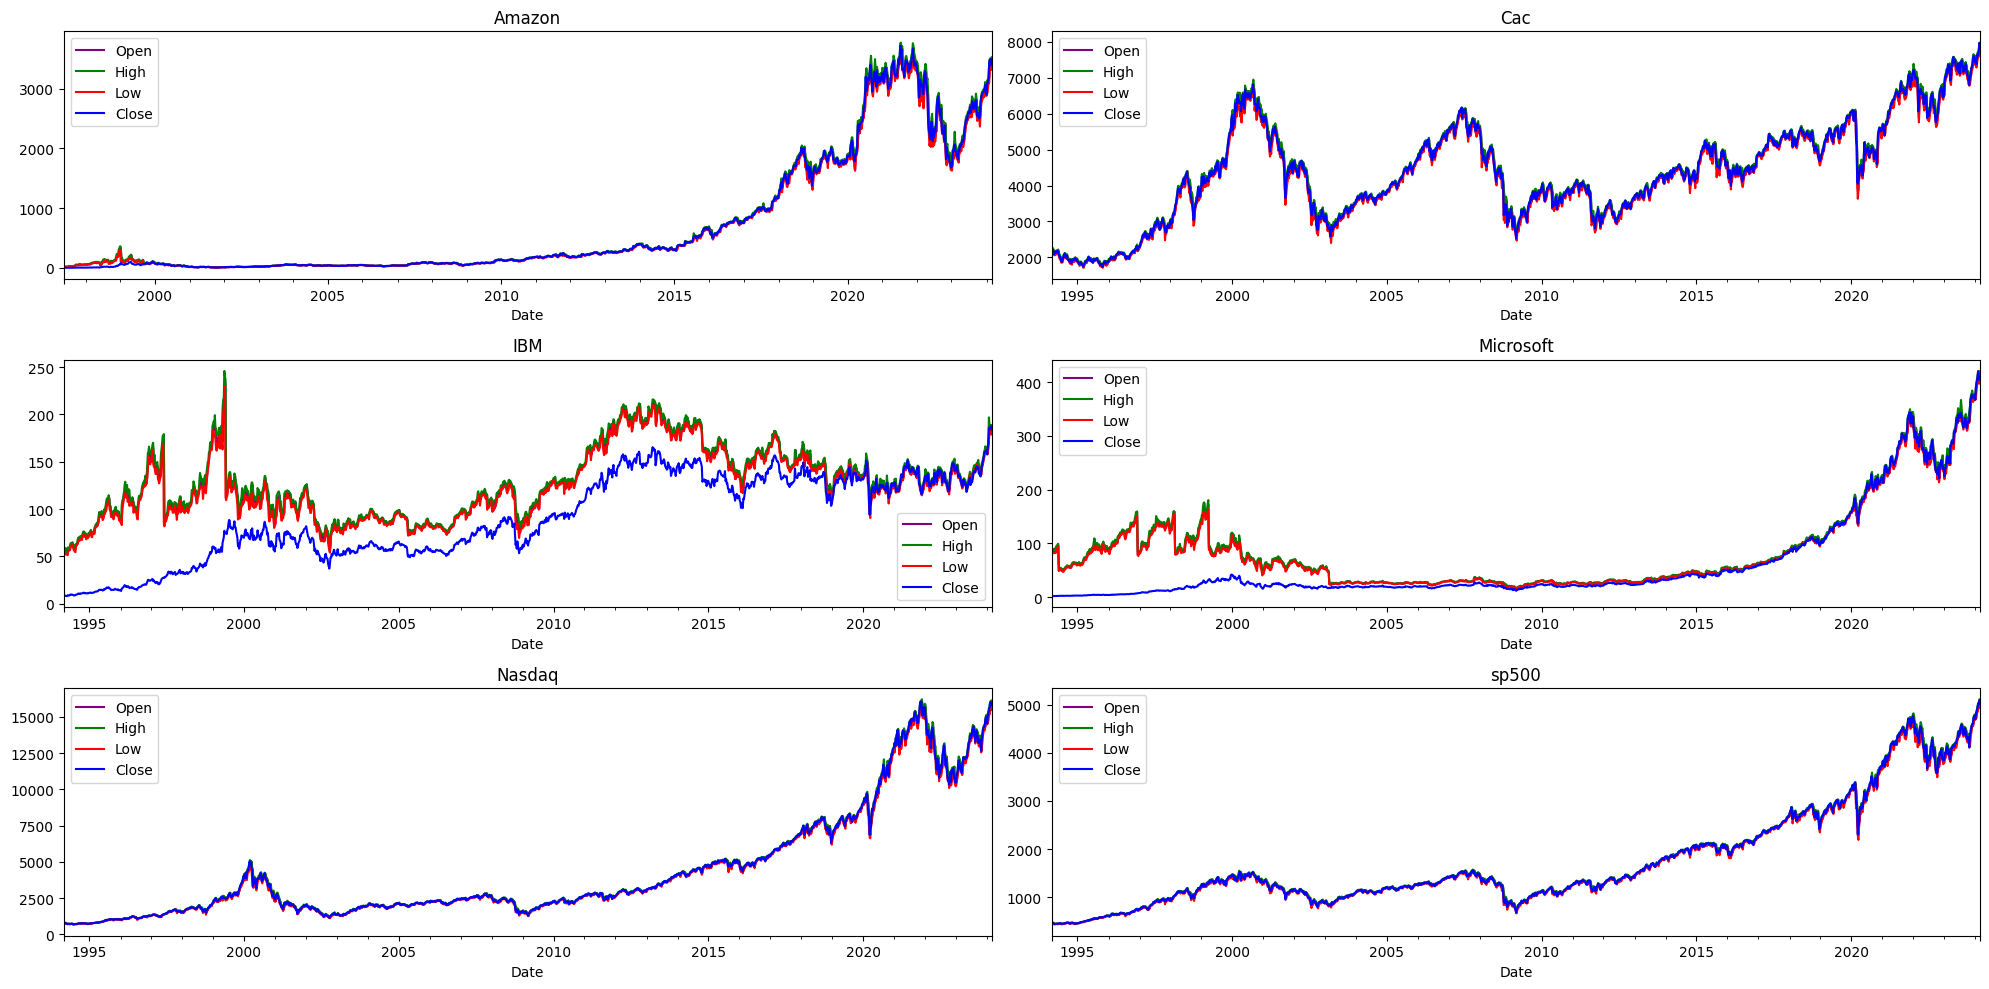

In [16]:
#check after our cleaning
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [17]:
#investigate missing values for the datasets
for name, df in zip(dfs_names, dfs):
    missing_rows = df[df.isna().any(axis=1)]
    if not missing_rows.empty:
        print(f"DataFrame: {name}")
        print(missing_rows)

for df in dfs:
    df.dropna(inplace=True)

Close<Low:
- Data recording errors: Errors might have occurred during the process of recording or entering the data, leading to inconsistencies.
- Data adjustments: Sometimes, historical data might be adjusted to account for corporate actions such as stock splits, dividends, or other factors. If not handled properly, these adjustments could lead to inconsistencies.
- Data processing issues: Errors might occur during data processing, such as merging or joining datasets, which could result in incorrect values being assigned.

In [18]:
#cases in which I have that Close<Low:
for df, name in zip(dfs, dfs_names):
    print(name, df[df['Close']<df['Low']])

Amazon           Date      Open      High      Low    Close    Volume
0   1997-05-18   18.0000   30.0000   18.000   1.7292   7238000
1   1997-05-25   21.1250   21.2500   15.750   1.5000   4836500
2   1997-06-01   18.1250   19.7500   17.500   1.5000   1611600
3   1997-06-08   18.1250   20.5000   16.500   1.6563   1527900
4   1997-06-15   19.8750   20.5000   18.375   1.5834    943700
..         ...       ...       ...      ...      ...       ...
115 1999-08-01  110.4375  115.5000   97.500  50.0313  55493000
116 1999-08-08   98.3750  102.1250   82.000  44.7813  63627000
117 1999-08-15   91.5000   97.4375   82.000  48.7188  42908500
118 1999-08-22   98.2500  117.5000   95.500  56.7188  48701800
119 1999-08-29  115.9375  135.5625  115.750  64.2500  48662200

[120 rows x 6 columns]
Cac Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
IBM            Date     Open     High      Low     Close    Volume
0    1994-03-06   53.125   53.875   52.125    8.0537   9055900
1    

SUM UP for Close<Low: 
- Amazon: we have 120 rows between '97 and '99
- Cac: no case
- IBM: 1370 cases from 1994 to 2024
- Microsoft: 1285 cases from 1994 to 2023
- Nasdaq: no case
- sp500: no case

In [19]:
#Check for duplicates
for df, name in zip(dfs, dfs_names):
    duplicates = df[df.duplicated()]
    print(name, duplicates)

Amazon Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Cac Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
IBM Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Microsoft Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Nasdaq Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
sp500 Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []


Outliers?

## PREPROCESSING

In [20]:
from sklearn.preprocessing import StandardScaler

#scaler
scaler = StandardScaler()
 
#standardization of the prices
for df in dfs:
    df[['Close', 'Open', 'Low', 'High']] = scaler.fit_transform(df[['Close', 'Open', 'Low', 'High']])

#question: is it better to use RobustScaler to transform the volume? Take a look at it and try whether the performance is then getting better.

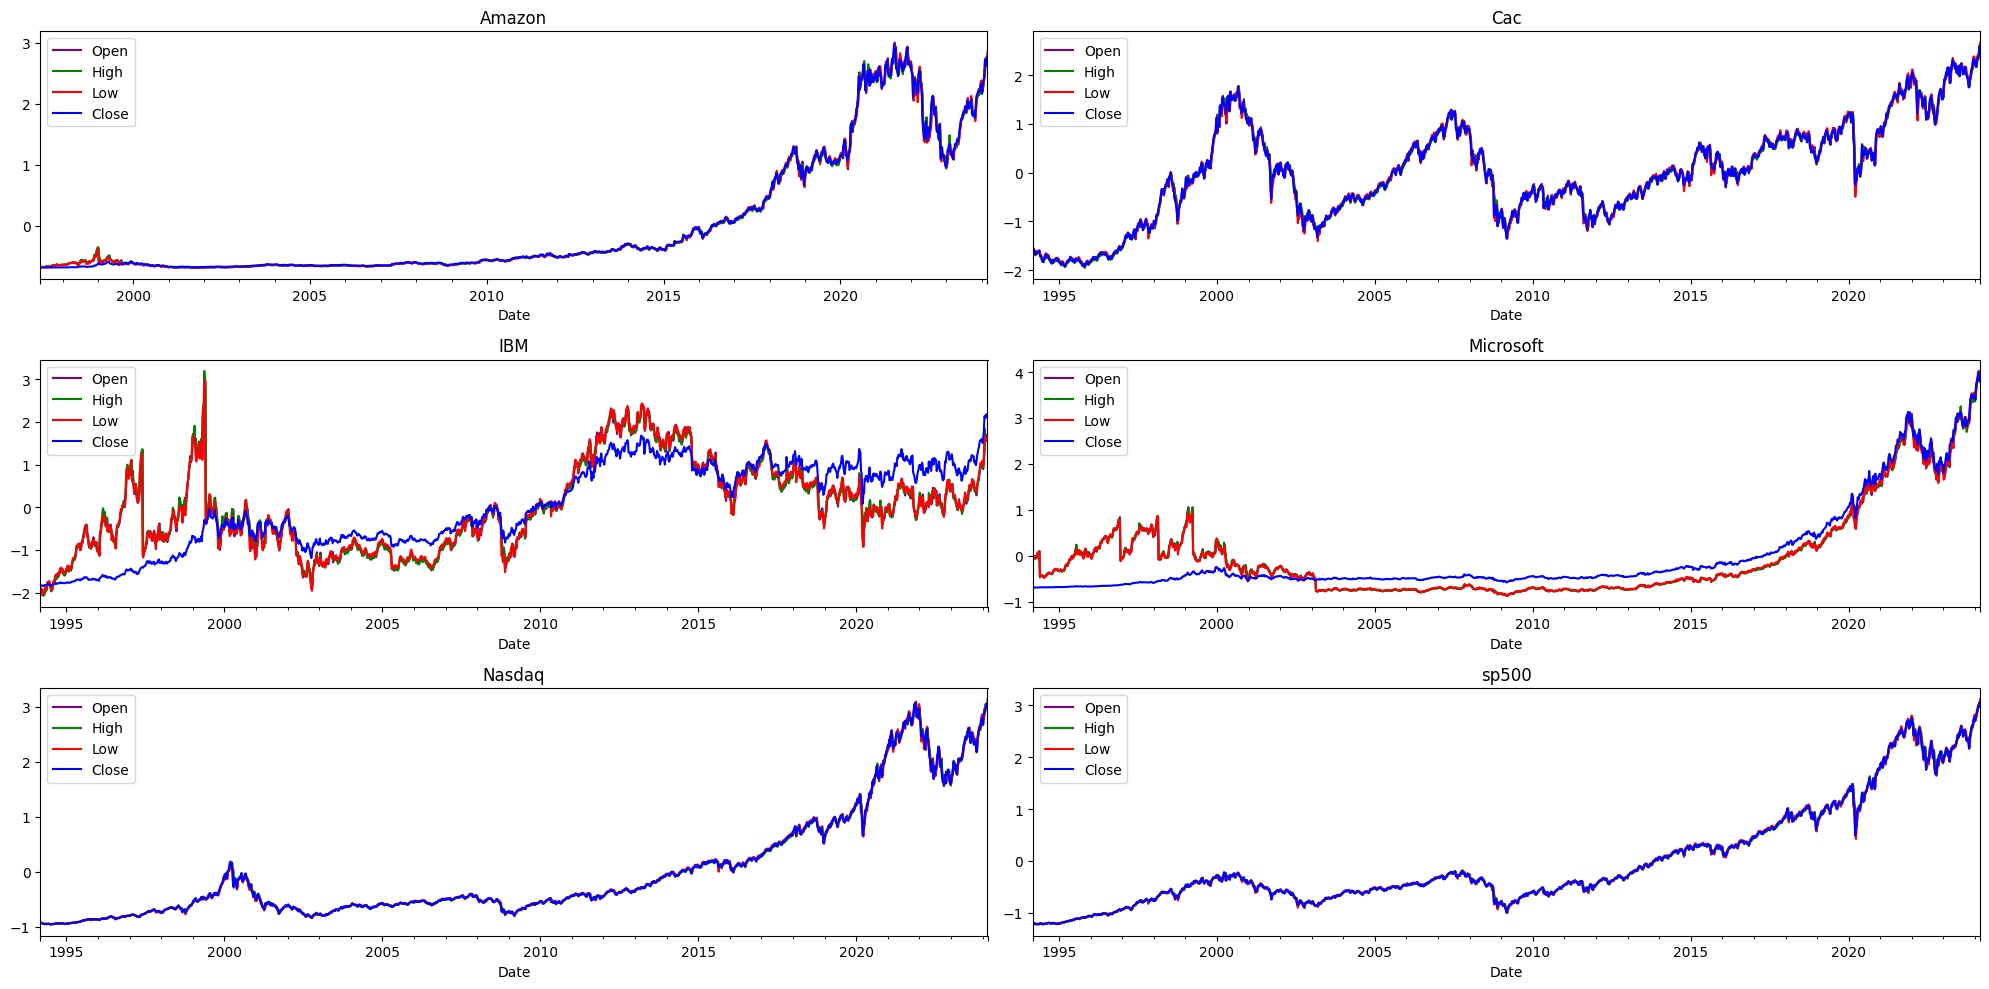

In [21]:
#plots with standardized prices
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler

#scaler
scaler = MinMaxScaler()
 
#standardization of the prices
for df in dfs:
    df.loc[df['Volume']>0, ['Volume']] = scaler.fit_transform(df.loc[df['Volume']>0, ['Volume']])

/var/folders/26/tx2f9zfx3qsggh9l7bch3ysh0000gn/T/ipykernel_26285/1508119283.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.01043072 0.00675671 0.001823   ... 0.37903372 0.30787828 0.06723607]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Volume']>0, ['Volume']] = scaler.fit_transform(df.loc[df['Volume']>0, ['Volume']])
/var/folders/26/tx2f9zfx3qsggh9l7bch3ysh0000gn/T/ipykernel_26285/1508119283.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.03643307 0.08431023 0.06392206 ... 0.14067079 0.10569937 0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Volume']>0, ['Volume']] = scaler.fit_transform(df.loc[df['Volume']>0, ['Volume']])
/var/folders/26/tx2f9zfx3qsggh9l7bch3ysh0000gn/T/ipykernel_26285/1508119283.py:8: Future

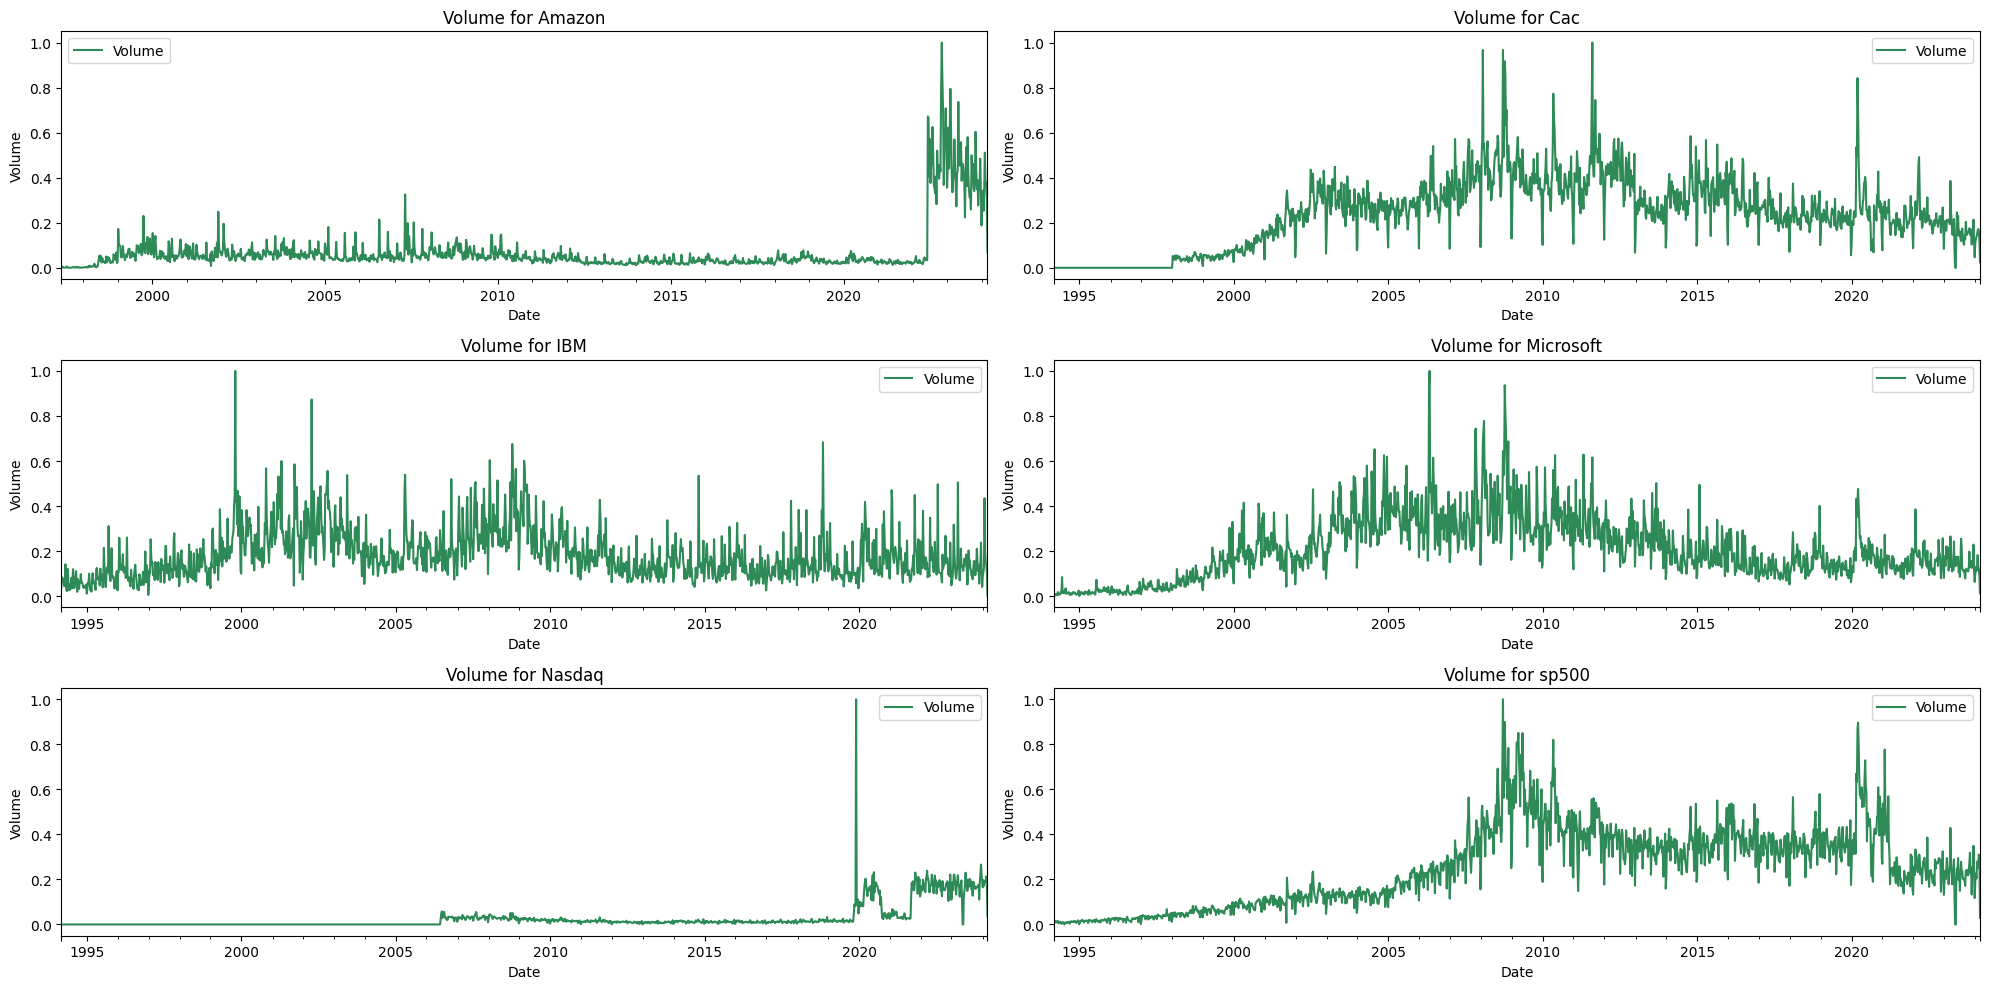

In [23]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Volume', ax=axs[i, j], color = 'seagreen')
        axs[i, j].set_title(f'Volume for {dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Volume')

plt.tight_layout()
plt.show()

In [24]:
# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate MACD (Moving Average Convergence Divergence)
def calculate_macd(data, short_window=12, long_window=26):
    short_ema = data['Close'].ewm(span=short_window, min_periods=1).mean()
    long_ema = data['Close'].ewm(span=long_window, min_periods=1).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=9, min_periods=1).mean()
    return macd, signal_line

In [25]:
for df in dfs:
    # Calculate moving averages (e.g., 10-day and 50-day)
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA40'] = df['Close'].rolling(window=40).mean()
    df['MACD'], df['Signal_Line'] = calculate_macd(df)
    df['RSI'] = calculate_rsi(df)

## INDEX

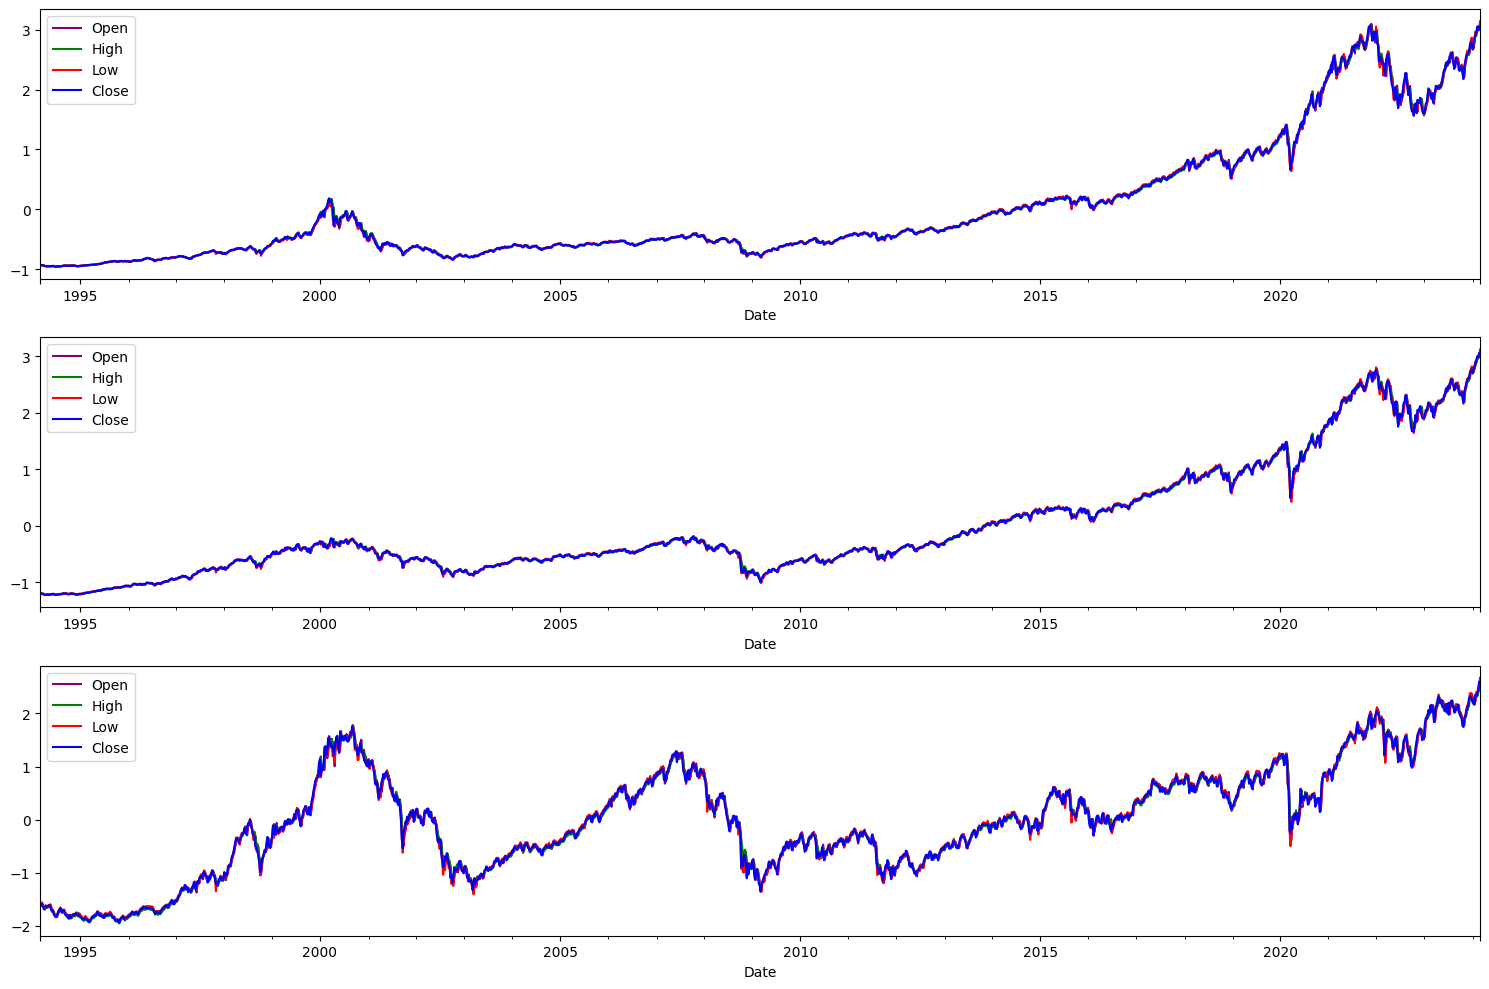

In [26]:
dfs_1 = [nasdaq_df, sp500_df, cac_df]
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
for i in range(3):
        dfs_1[i].plot(x='Date', y='Open', ax=axs[i], color = 'purple')
        dfs_1[i].plot(x='Date', y='High', ax=axs[i], color = 'green')
        dfs_1[i].plot(x='Date', y='Low', ax=axs[i], color = 'red')
        dfs_1[i].plot(x='Date', y='Close', ax=axs[i], color = 'blue')
plt.tight_layout()
plt.show()

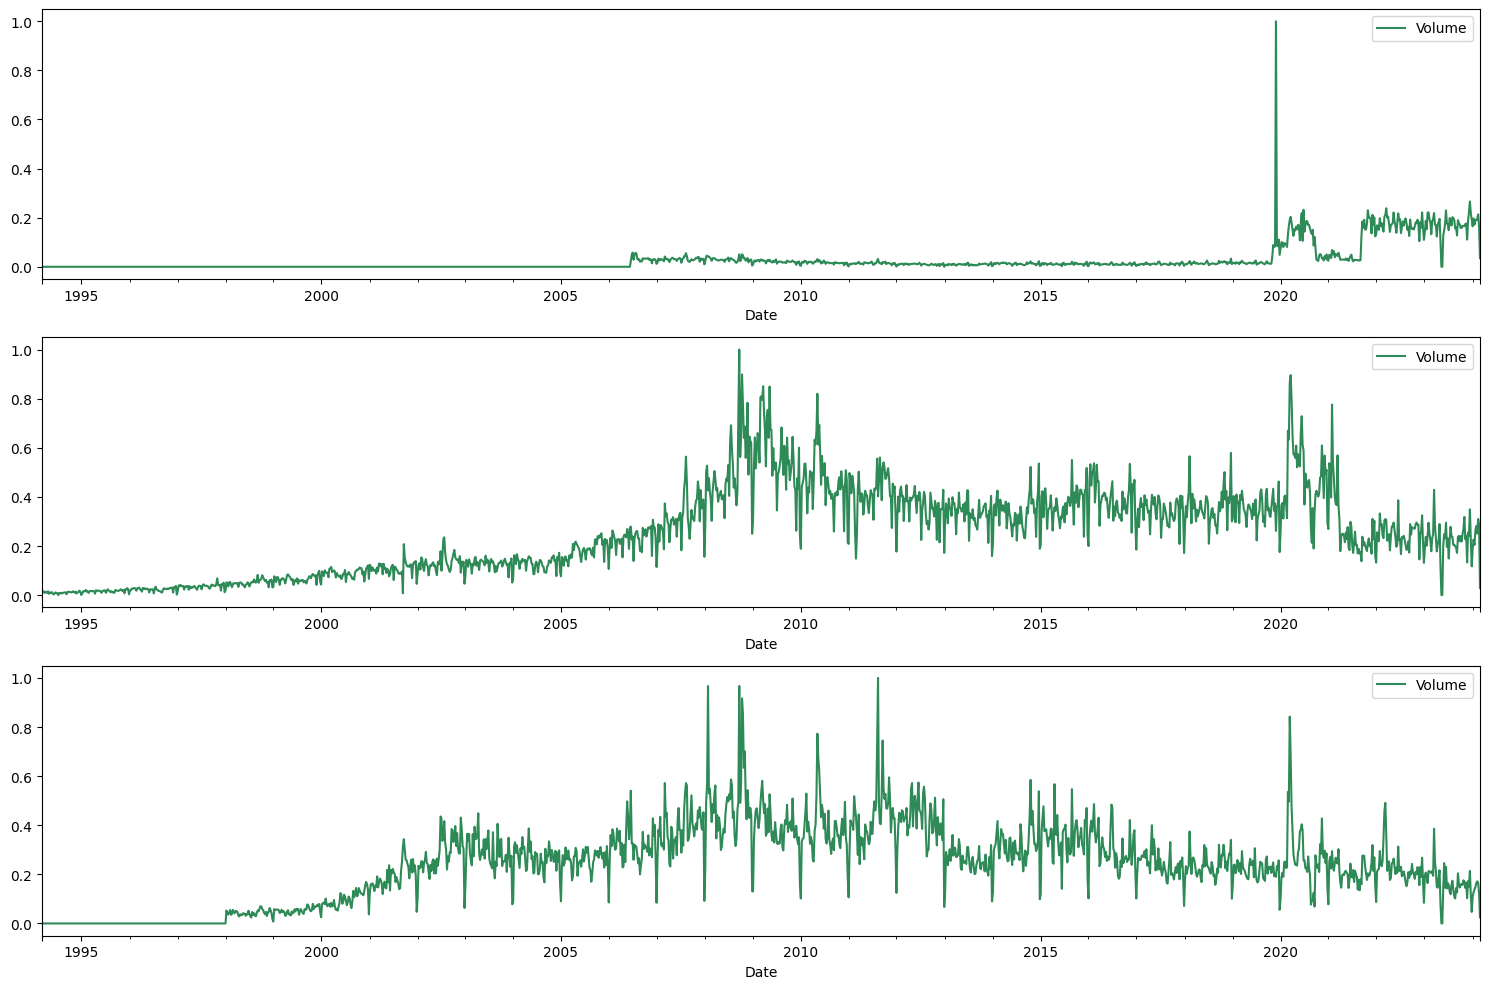

In [27]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
for i in range(3):
        dfs_1[i].plot(x='Date', y='Volume', ax=axs[i], color = 'seagreen')
plt.tight_layout()
plt.show()

## ARIMA

- _AR(p) and MA(q)_

AR(p) and MA(q): these two methods are used to check how the stationarity is dependent on past errors or on past data respectively. In both case, the dependence is considered to be in additive way. The names clarify the two approaches: Moving Average and Autoregression; q is the number of the past errors the future data is depending upon, while p is the same but which past data. 

- _ACF plots and ACF function_

Precondition: both ACF and PACF assume stationarity of the underlyinh time series.
Autocorrelation: correlation between a time series with a lagged version of itself. The ACF starts with a lag at 0, which is the correlation of the time series with itself t(therefore results in a correlation of 1). 

https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c#:~:text=in%20your%20browser.-,Autocorrelation%20Function%20(ACF),plot_acf%20function%20from%20the%20statsmodels.

Autocorrelation analysis helps detect pattern and check for randomness. It's very important when using ARMA model because it backs the finding of the parameters. ACF is giving you similarity, so it doesn't provide you any insight for a good estimation of p. 
But, ACF is useful when it comes to work with MA(q). The ACF plot can tell things like the observed time series is white noise/random.
So, we have to move to PACF for p, which is a conditional correlation.The order is the dirrefence between the indexes of times (e.g.: it's 2 for t_1, t_3). If you calculate the PACF function of AR(p), it will be 0 after time lag = p. The cutting off of PACF(h) after p lags is the AR’s signature (p) model.

!!check parameter method = 'ols'

- _ARMa(p,q)_

It's a combination of the two model, and it's used to model stationary nonseasonal time series data. To select the best model, we compute the BIC for all the three and select the one which has the lowest value. To get the best parameters, we should compute AIC or BIC over a subset of p,q.

- _ARIMA(d,p,q)_

Change data into stationary data by transformation and differencing. (I)
Apply AR and MA models to estimate the dependence structure of the differenced time series and predict.
That’s AR + I + MA = ARIMA for you.

- _lollipop plots_

The blue area you see in ACF and PACF plots is the confidence interval and is an indicator of the significance threshold. TO DETERMINE THE ORDER OF THE MODEL: how many lollipopos are above/below the confidence interval before the next lollipop enters the blue area? 


In [28]:
#Augmented Dickey-Fuller (ADF) test on each time series provided in the dfs list. 
#The ADF test is a statistical test used to determine whether a unit root is present in a time series dataset. 
#A unit root indicates that the series is non-stationary, meaning it has a trend or seasonality that needs to be removed for accurate analysis.

from statsmodels.tsa.stattools import adfuller

#  Define a function adf_check that takes a time series as input and performs the ADF test on it.
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Number of Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        #Checks if the p-value from the ADF test is less than or equal to 0.05, which is a common significance level. 
        #If so, it indicates evidence against the null hypothesis of a unit root being present.
        print(f"Reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        #If the p-value is greater than 0.05, the null hypothesis cannot be rejected.
        print(f"Fail to reject the null hypothesis. Time series has a unit root, indicating it is non-stationary.")


for df in dfs: #qui aggiungere un print con il nome del dataset
    adf_check(df['Close'])

for df in dfs: #qui aggiungere un print con il nome del dataset
    adf_check(df['Volume'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.7060903184962026
p-value : 0.989958631891561
#Number of Lags Used : 20
Number of Observations Used : 1378
Fail to reject the null hypothesis. Time series has a unit root, indicating it is non-stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.4241079563224552
p-value : 0.5706654584633903
#Number of Lags Used : 22
Number of Observations Used : 1543
Fail to reject the null hypothesis. Time series has a unit root, indicating it is non-stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.0314511759328964
p-value : 0.74162110234799
#Number of Lags Used : 5
Number of Observations Used : 1560
Fail to reject the null hypothesis. Time series has a unit root, indicating it is non-stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : 3.8802995033118615
p-value : 1.0
#Number of Lags Used : 12
Number of Observations Used : 1553
Fail to reject the null hypothesis. Time series has a unit root, indicating it is n

selection of d parameter for ARIMA model


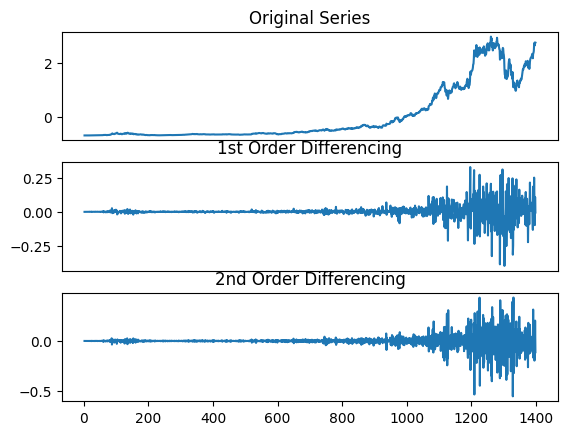

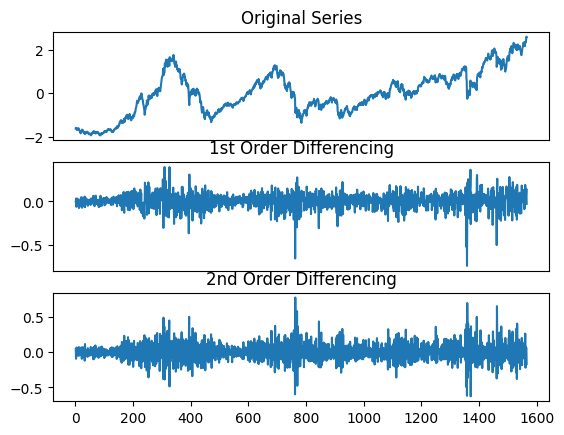

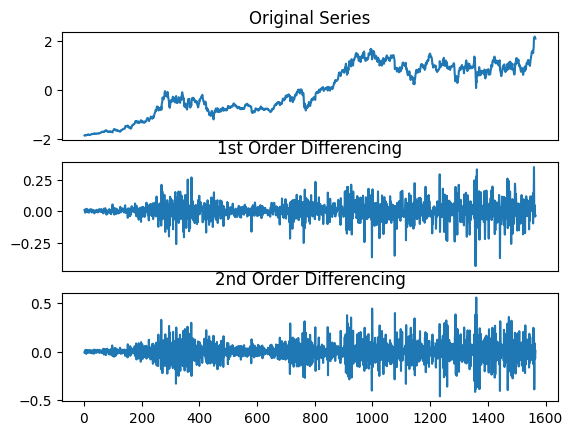

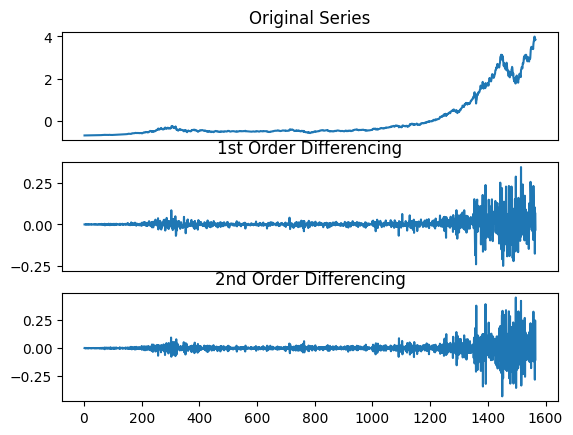

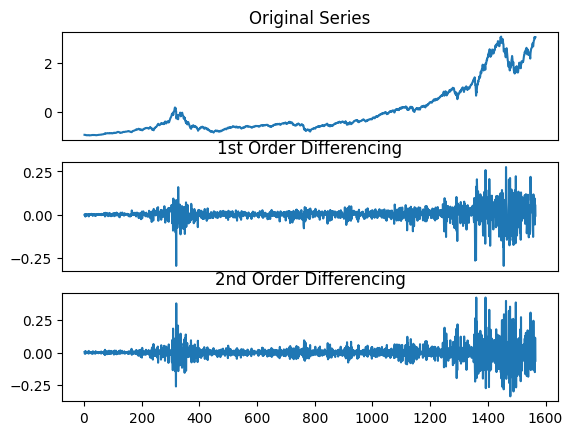

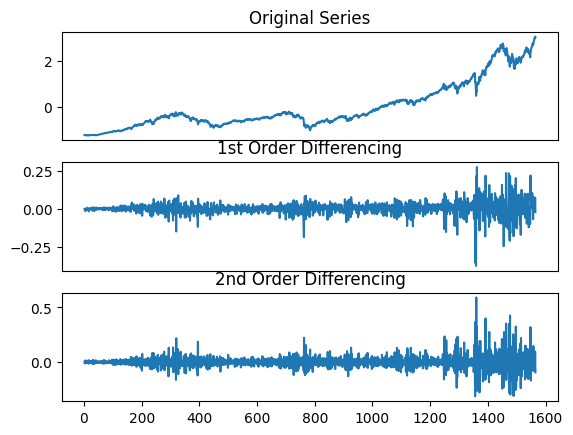

In [29]:
print('selection of d parameter for ARIMA model')
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
for df in dfs:
    fig, (ax1, ax2, ax3) = plt.subplots(3)
    ax1.plot(df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
    ax2.plot(df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
    ax3.plot(df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
    plt.show()

In [30]:
#check: close and volume don't have inf values
for df in dfs:
    inf_close = np.isinf(df['Close']).any()
    inf_volume = np.isinf(df['Volume']).any()
    print(inf_close, inf_volume)

False False
False False
False False
False False
False False
False False


In [31]:
#check: close and volume don't have nan
for df in dfs:
    nan_close = (df['Close']).isna().sum()
    nan_volume = (df['Volume']).isna().sum()
    print(nan_close, nan_volume)


0 0
0 0
0 0
0 0
0 0
0 0


In [87]:
#correzione esponenziale di ibm con il logaritmo 
ibm_df['Log Close'] = np.log(ibm_df['Close']+2)

#correzione esponenziale di microsoft con il logaritmo 
microsoft_df['Log Close'] = np.log(microsoft_df['Close']+1)

#correzione esponenziale di nasdaq con il logaritmo 
nasdaq_df['Log Close'] = np.log(nasdaq_df['Close']+1)

#correzione esponenziale di sp500 con il logaritmo 
sp500_df['Log Close'] = np.log(sp500_df['Close']+1)

#correzione esponenziale di cac con il logaritmo 
cac_df['Log Close'] = np.log(cac_df['Close']+2)

#correzione esponenziale di amazon con il logaritmo 
amazon_df['Log Close'] = np.log(amazon_df['Close']+2)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log



Reference for parameters selection:
https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

In [101]:
#split train and test
from sklearn.model_selection import train_test_split 
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go
from pandas import DateOffset
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot

train_size_nasdaq = int(len(sp500_df) * 0.8)  # 80% for training
nasdaq_train, nasdaq_test = nasdaq_df[:train_size_nasdaq], nasdaq_df[train_size_nasdaq:]
train_size_sp500 = int(len(sp500_df) * 0.8)  # 80% for training
sp500_train, sp500_test = sp500_df[:train_size_sp500], sp500_df[train_size_sp500:]
train_size_cac = int(len(cac_df) * 0.8)  # 80% for training
cac_train, cac_test = cac_df[:train_size_cac], cac_df[train_size_cac:]
train_size_microsoft = int(len(microsoft_df) * 0.8)
microsoft_train, microsoft_test = microsoft_df[:train_size_microsoft], microsoft_df[train_size_microsoft:]
train_size_ibm = int(len(ibm_df) * 0.8)  # 80% for training
ibm_train, ibm_test = ibm_df[:train_size_ibm], ibm_df[train_size_ibm:]
train_size_amazon = int(len(amazon_df) * 0.8)  # 80% for training
amazon_train, amazon_test = amazon_df[:train_size_amazon], amazon_df[train_size_amazon:]

microsoft_test.set_index('Date', inplace=True)
microsoft_train.set_index('Date', inplace=True)
ibm_test.set_index('Date', inplace=True)
ibm_train.set_index('Date', inplace=True)
nasdaq_test.set_index('Date', inplace=True)
nasdaq_train.set_index('Date', inplace=True)
sp500_test.set_index('Date', inplace=True)
sp500_train.set_index('Date', inplace=True)
cac_test.set_index('Date', inplace=True)
cac_train.set_index('Date', inplace=True)
amazon_test.set_index('Date', inplace=True)
amazon_train.set_index('Date', inplace=True)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -19.404643204355665
p-value : 0.0
#Number of Lags Used : 4
Number of Observations Used : 1560
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.582122914456829
p-value : 4.451169833361188e-27
#Number of Lags Used : 22
Number of Observations Used : 1541
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.753703532096248
p-value : 6.663222799697028e-05
#Number of Lags Used : 2
Number of Observations Used : 1509
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -11.120347941767854
p-value : 3.478553347369868e-20
#Number of Lags Used : 18
Number of Observations Used : 1492
Reject the null hypothesis. Data has no unit root and is stationary.
selection of p
selection of q


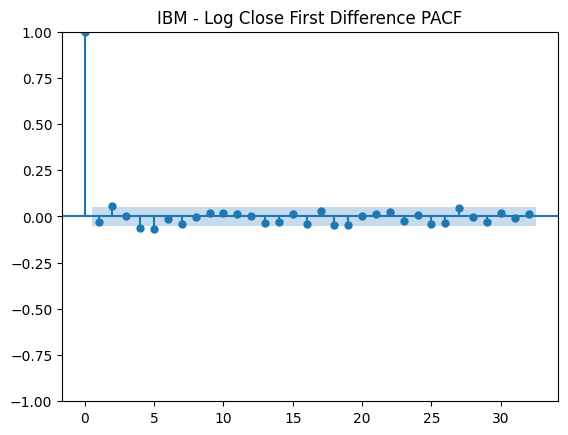

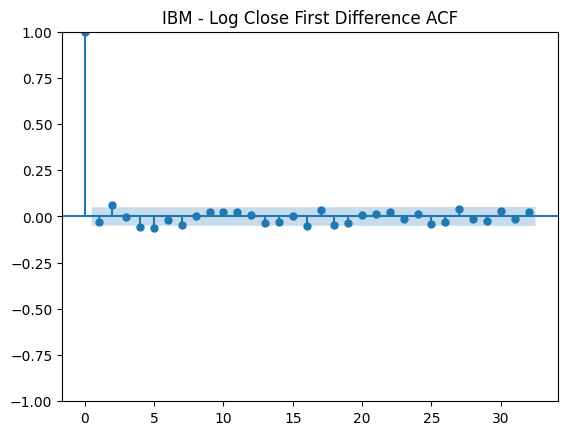

In [102]:
#selection of p and q for IBM
for df in [ibm_df]:
    df['Log Close First Difference'] = df['Log Close']- df['Log Close'].shift(1)
    adf_check(df['Log Close First Difference'].dropna())

    df['Log Close Second Difference'] = df['Log Close First Difference']- df['Log Close First Difference'].shift(1)
    adf_check(df['Log Close Second Difference'].dropna())

    df['Log Seasonal Difference'] = df['Log Close'] - df['Log Close'].shift(54) #verificaredi avere 54 settimane per anno nei dataset
    adf_check(df['Log Seasonal Difference'].dropna())

    df['Seasonal First Difference'] = df['Log Close First Difference'] - df['Log Close First Difference'].shift(54)
    adf_check(df['Seasonal First Difference'].dropna())

    #Plots the autocorrelation function (ACF) for the first differenced data and the seasonal first differenced data: 
    #ACF plots are needed to select q parameters, while PACF are useful to get p

print('selection of p')
fig_first = plot_pacf(ibm_df['Log Close First Difference'].dropna(), title='IBM - Log Close First Difference PACF')

print('selection of q')
second_first = plot_acf(ibm_df['Log Close First Difference'].dropna(), title='IBM - Log Close First Difference ACF')
    
    # Seasonal First Difference
    #fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna(), title=f'{df_name} - Seasonal First Difference ACF')
    
    # Autocorrelation plot for Seasonal First Difference
    #autocorrelation_plot(df['Seasonal First Difference'].dropna())
    #plt.title(f'{df_name} - Seasonal First Difference Autocorrelation Plot')
    #plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(2, 2, 1)   Log Likelihood                1692.035
Date:                Tue, 09 Apr 2024   AIC                          -3376.070
Time:                        22:48:48   BIC                          -3355.546
Sample:                    03-06-1994   HQIC                         -3368.354
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0672      0.023     -2.929      0.003      -0.112      -0.022
ar.L2          0.0262      0.023      1.159      0.246      -0.018       0.071
ma.L1         -1.0000      0.377     -2.655      0.0

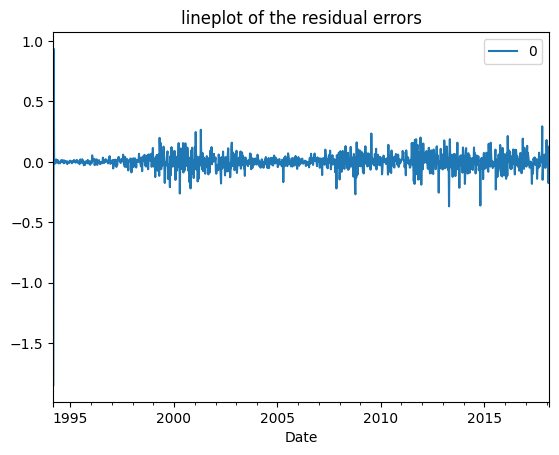

                 0
count  1252.000000
mean     -0.001005
std       0.085473
min      -1.845263
25%      -0.028538
50%       0.000927
75%       0.027803
max       0.933770


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

/var/folders/26/tx2f9zfx3qsggh9l7bch3ysh0000gn/T/ipykernel_26285/3908379921.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



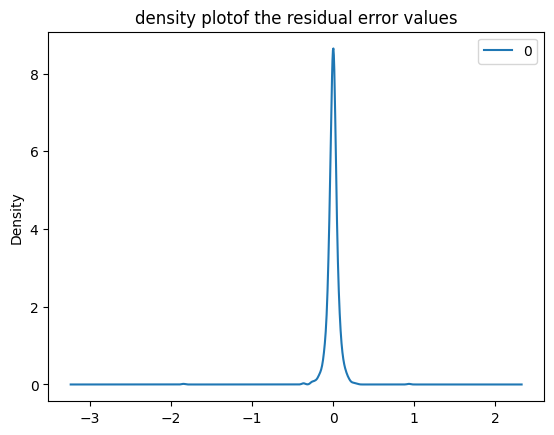

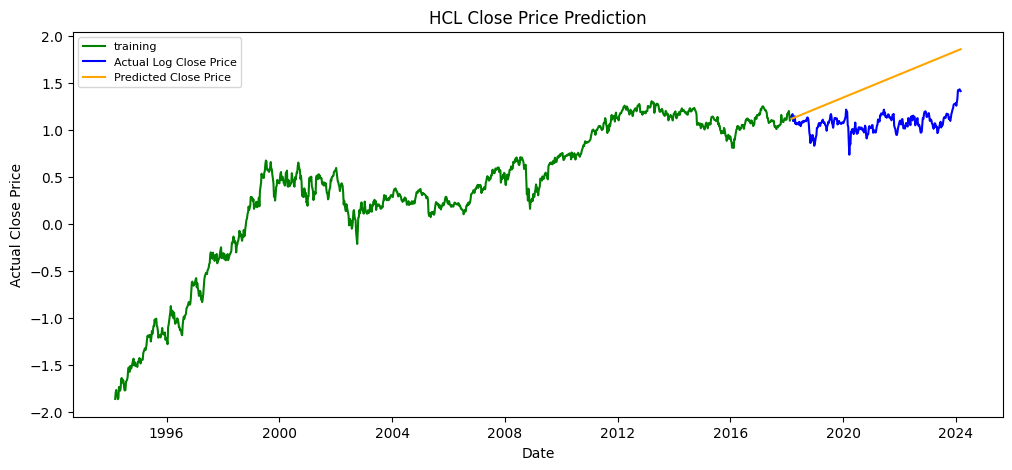

MSE: 0.2070648790417082
MAE: 0.2070648790417082
RMSE: 0.4550438210125572
MAPE: 0.3862274221263099


In [103]:
#IBM
model = ARIMA(ibm_train['Close'], order=(2,2,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE. 
        ##add the seasonal orders too!!

results = model.fit() 
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() # suggesting that they still be some trend information not captured by the model?
plt.title('lineplot of the residual errors')
plt.show()
residuals.plot(kind='kde') 
plt.title('density plotof the residual error values')
print(residuals.describe())
ibm_test.shape

#forecast
fc = results.forecast(314, alpha=0.05)
ibm_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ibm_train['Log Close'], color='green',label='training')
plt.plot(ibm_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(ibm_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('IBM Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=ibm_test.index, y=ibm_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=ibm_test.index, y=ibm_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for IBM',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(ibm_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(ibm_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(ibm_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-ibm_test['Log Close'])/np.abs(ibm_test['Log Close']))
print('MAPE: '+str(mape))

Augmented Dickey-Fuller Test:
ADF Test Statistic : -19.60760955171467
p-value : 0.0
#Number of Lags Used : 4
Number of Observations Used : 1560
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.650698815575844
p-value : 3.5042970930858155e-27
#Number of Lags Used : 23
Number of Observations Used : 1540
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.65261104065033
p-value : 0.004831310761287103
#Number of Lags Used : 0
Number of Observations Used : 1511
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -17.971096554079256
p-value : 2.795498418197255e-30
#Number of Lags Used : 5
Number of Observations Used : 1505
Reject the null hypothesis. Data has no unit root and is stationary.
selection of p
selection of q


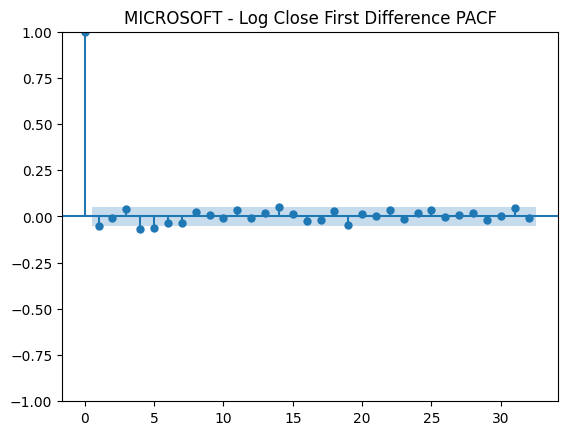

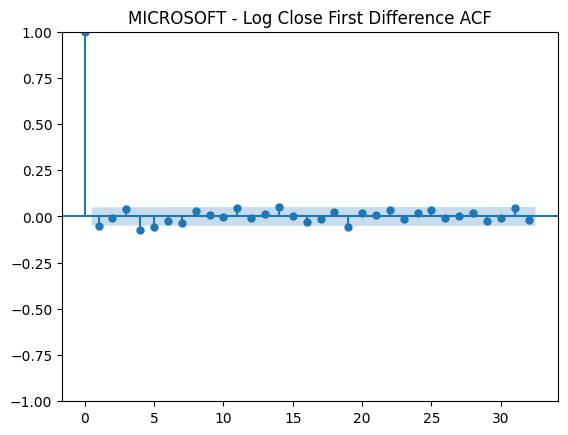

In [104]:
#indagine di p e q per microsoft
microsoft_df['Log Close First Difference'] = microsoft_df['Log Close']- microsoft_df['Log Close'].shift(1)
adf_check(microsoft_df['Log Close First Difference'].dropna())

microsoft_df['Log Close Second Difference'] = microsoft_df['Log Close First Difference']- microsoft_df['Log Close First Difference'].shift(1)
adf_check(microsoft_df['Log Close Second Difference'].dropna())

microsoft_df['Log Seasonal Difference'] = microsoft_df['Log Close'] - microsoft_df['Log Close'].shift(54) #verificaredi avere 54 settimane per anno nei dataset
adf_check(microsoft_df['Log Seasonal Difference'].dropna())

microsoft_df['Seasonal First Difference'] = microsoft_df['Log Close First Difference'] - microsoft_df['Log Close First Difference'].shift(54)
adf_check(microsoft_df['Seasonal First Difference'].dropna())

    #Plots the autocorrelation function (ACF) for the first differenced data and the seasonal first differenced data: 
    #ACF plots are needed to select q parameters, while PACF are useful to get p

print('selection of p')
fig_first = plot_pacf(microsoft_df['Log Close First Difference'].dropna(), title='MICROSOFT - Log Close First Difference PACF')

print('selection of q')
second_first = plot_acf(microsoft_df['Log Close First Difference'].dropna(), title='MICROSOFT - Log Close First Difference ACF')
    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(2, 2, 1)   Log Likelihood                3801.421
Date:                Tue, 09 Apr 2024   AIC                          -7594.843
Time:                        22:44:59   BIC                          -7574.319
Sample:                    03-06-1994   HQIC                         -7587.127
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0332      0.017     -1.899      0.058      -0.067       0.001
ar.L2         -0.0268      0.018     -1.485      0.138      -0.062       0.009
ma.L1         -0.9924      0.004   -265.147      0.0

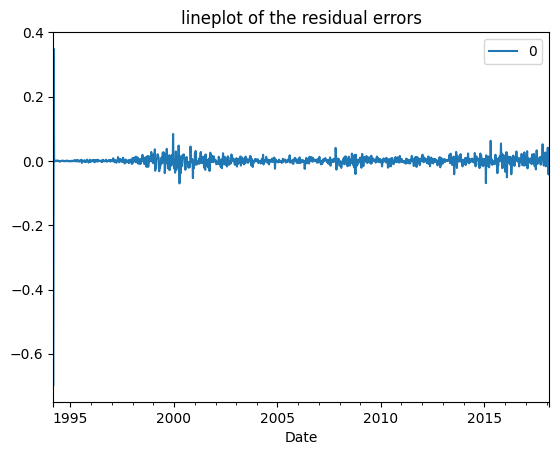

                 0
count  1252.000000
mean      0.000051
std       0.024870
min      -0.696917
25%      -0.004290
50%       0.000124
75%       0.005308
max       0.348644


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

/var/folders/26/tx2f9zfx3qsggh9l7bch3ysh0000gn/T/ipykernel_26285/360160197.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



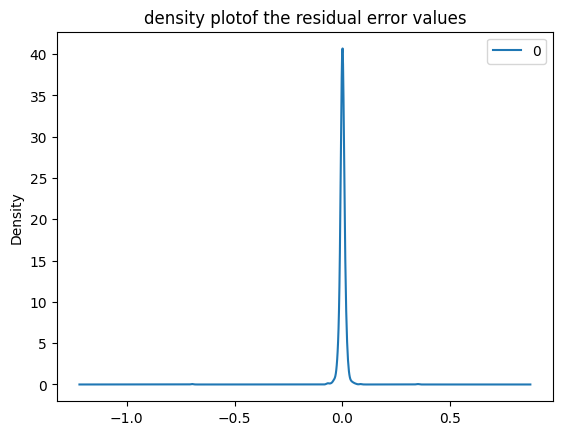

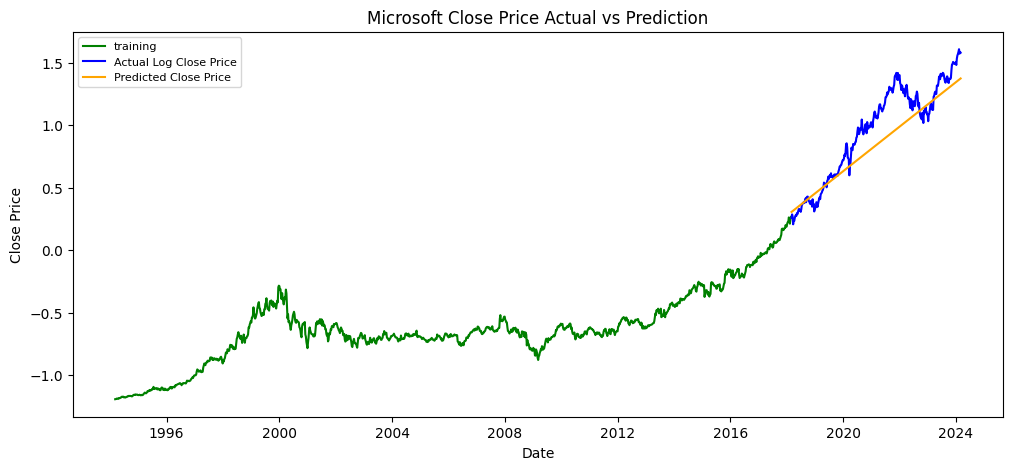

MSE: 0.031319458481803585
MAE: 0.031319458481803585
RMSE: 0.17697304450622864
MAPE: 0.1425293640202631


In [99]:
#MICROSOFT
model = ARIMA(microsoft_train['Close'], order=(2,2,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE. 
        ##add the seasonal orders too!!

results = model.fit() 
print(results.summary())
# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() 
plt.title('lineplot of the residual errors')
#suggesting that they still be some trend information not captured by the model
plt.show()
residuals.plot(kind='kde') 
plt.title('density plotof the residual error values')
print(residuals.describe())

#forecast
fc = results.forecast(314, alpha=0.05)
microsoft_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(microsoft_train['Log Close'], color='green',label='training')
plt.plot(microsoft_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(microsoft_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('Microsoft Close Price Actual vs Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=microsoft_test.index, y=microsoft_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=microsoft_test.index, y=microsoft_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for Microsoft',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(microsoft_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(microsoft_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(microsoft_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-microsoft_test['Log Close'])/np.abs(microsoft_test['Log Close']))
print('MAPE: '+str(mape))

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.88744512623205
p-value : 2.9785084956032584e-07
#Number of Lags Used : 24
Number of Observations Used : 1373
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.535437666999327
p-value : 5.24848063984729e-27
#Number of Lags Used : 23
Number of Observations Used : 1373
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.273550529607794
p-value : 0.016102965306659656
#Number of Lags Used : 23
Number of Observations Used : 1321
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -6.015186348708945
p-value : 1.5397150277741517e-07
#Number of Lags Used : 23
Number of Observations Used : 1320
Reject the null hypothesis. Data has no unit root and is stationary.
selection of p
selection of q


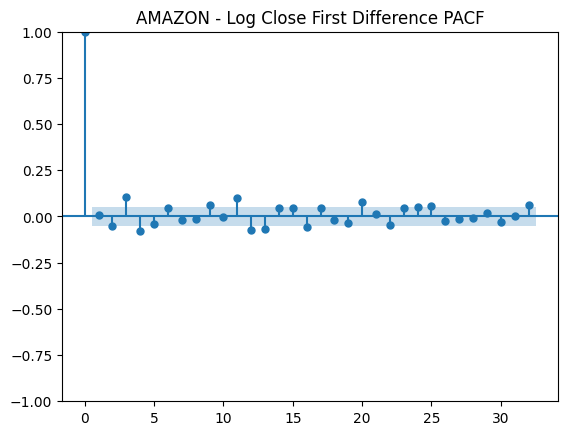

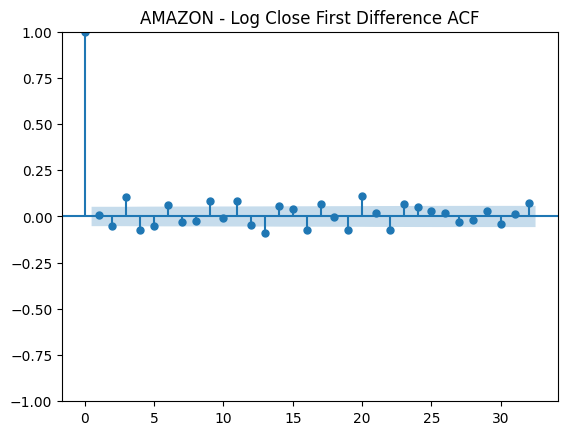

In [105]:
#indagine di p e q per amazon
amazon_df['Log Close First Difference'] = amazon_df['Log Close']- amazon_df['Log Close'].shift(1)
adf_check(amazon_df['Log Close First Difference'].dropna())

amazon_df['Log Close Second Difference'] = amazon_df['Log Close First Difference']- amazon_df['Log Close First Difference'].shift(1)
adf_check(amazon_df['Log Close Second Difference'].dropna())

amazon_df['Log Seasonal Difference'] = amazon_df['Log Close'] - amazon_df['Log Close'].shift(54) #verificaredi avere 54 settimane per anno nei dataset
adf_check(amazon_df['Log Seasonal Difference'].dropna())

amazon_df['Seasonal First Difference'] = amazon_df['Log Close First Difference'] - amazon_df['Log Close First Difference'].shift(54)
adf_check(amazon_df['Seasonal First Difference'].dropna())

    #Plots the autocorrelation function (ACF) for the first differenced data and the seasonal first differenced data: 
    #ACF plots are needed to select q parameters, while PACF are useful to get p

print('selection of p')
fig_first = plot_pacf(amazon_df['Log Close First Difference'].dropna(), title='AMAZON - Log Close First Difference PACF')

print('selection of q')
second_first = plot_acf(amazon_df['Log Close First Difference'].dropna(), title='AMAZON - Log Close First Difference ACF')
    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1119
Model:                 ARIMA(3, 3, 1)   Log Likelihood                2978.217
Date:                Tue, 09 Apr 2024   AIC                          -5946.433
Time:                        22:54:10   BIC                          -5921.346
Sample:                    05-18-1997   HQIC                         -5936.949
                         - 10-21-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7908      0.010    -80.851      0.000      -0.810      -0.772
ar.L2         -0.5546      0.015    -37.717      0.000      -0.583      -0.526
ar.L3         -0.2395      0.012    -19.245      0.0

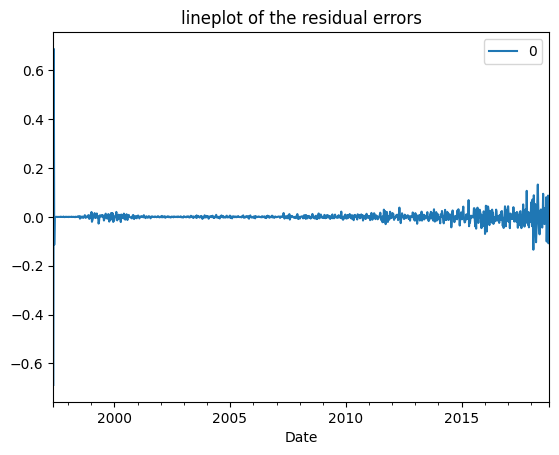

                 0
count  1119.000000
mean     -0.000242
std       0.033712
min      -0.687700
25%      -0.003563
50%      -0.000045
75%       0.003188
max       0.687475


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

/var/folders/26/tx2f9zfx3qsggh9l7bch3ysh0000gn/T/ipykernel_26285/92047619.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



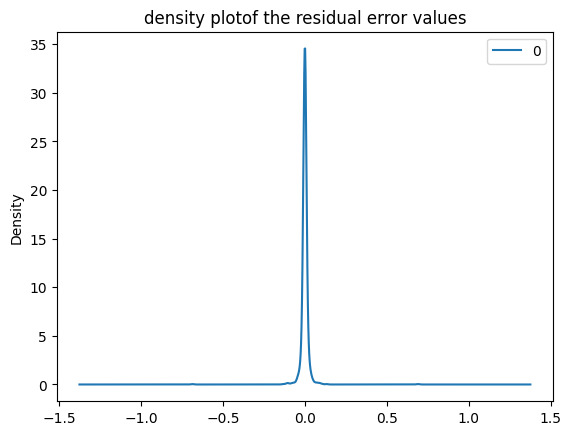

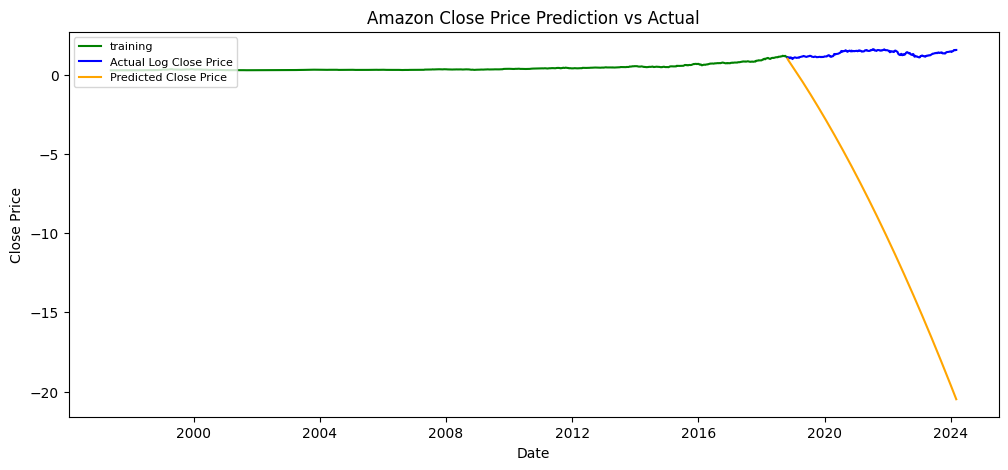

MSE: 141.60849289291593
MAE: 141.60849289291593
RMSE: 11.899936676004454
MAPE: 7.481281247939621


In [106]:
#AMAZON -->> problemi!
model = ARIMA(amazon_train['Close'], order=(3,3,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE. 
        ##add the seasonal orders too!!

results = model.fit() 
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #suggesting that they still be some trend information not captured by the model?
plt.title('lineplot of the residual errors')
plt.show()
residuals.plot(kind='kde') 
plt.title('density plotof the residual error values')
print(residuals.describe())

#forecast
fc = results.forecast(280, alpha=0.05)
amazon_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(amazon_train['Log Close'], color='green',label='training')
plt.plot(amazon_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(amazon_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('Amazon Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=amazon_test.index, y=amazon_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=amazon_test.index, y=amazon_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for Amazon',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(amazon_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(amazon_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(amazon_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-amazon_test['Log Close'])/np.abs(amazon_test['Log Close']))
print('MAPE: '+str(mape))

Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.9858326728904
p-value : 1.1442373011886318e-27
#Number of Lags Used : 6
Number of Observations Used : 1558
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.328809074578338
p-value : 1.108861271584385e-26
#Number of Lags Used : 24
Number of Observations Used : 1539
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.150645120083967
p-value : 0.0007977806768564477
#Number of Lags Used : 16
Number of Observations Used : 1495
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -10.028233756364026
p-value : 1.6106144012381934e-17
#Number of Lags Used : 16
Number of Observations Used : 1494
Reject the null hypothesis. Data has no unit root and is stationary.
selection of p
selection of q


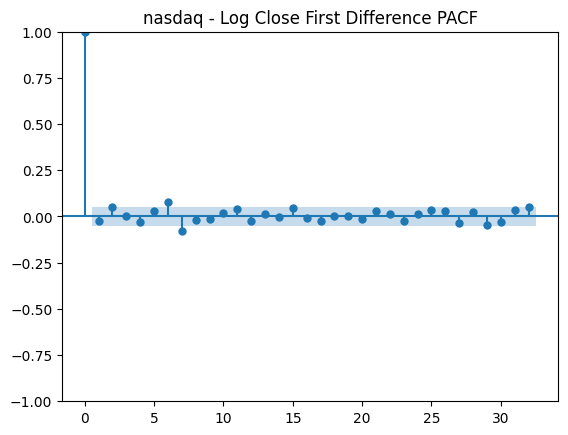

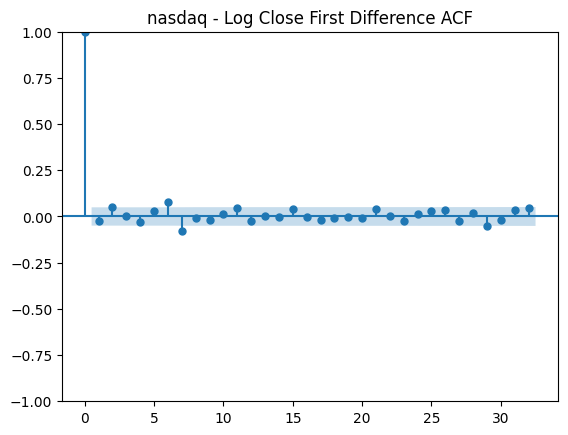

In [107]:
#indagine di p e q per 
nasdaq_df['Log Close First Difference'] = nasdaq_df['Log Close']- nasdaq_df['Log Close'].shift(1)
adf_check(nasdaq_df['Log Close First Difference'].dropna())

nasdaq_df['Log Close Second Difference'] = nasdaq_df['Log Close First Difference']- nasdaq_df['Log Close First Difference'].shift(1)
adf_check(nasdaq_df['Log Close Second Difference'].dropna())

nasdaq_df['Log Seasonal Difference'] = nasdaq_df['Log Close'] - nasdaq_df['Log Close'].shift(54) #verificaredi avere 54 settimane per anno nei dataset
adf_check(nasdaq_df['Log Seasonal Difference'].dropna())

nasdaq_df['Seasonal First Difference'] = nasdaq_df['Log Close First Difference'] - nasdaq_df['Log Close First Difference'].shift(54)
adf_check(nasdaq_df['Seasonal First Difference'].dropna())

    #Plots the autocorrelation function (ACF) for the first differenced data and the seasonal first differenced data: 
    #ACF plots are needed to select q parameters, while PACF are useful to get p

print('selection of p')
fig_first = plot_pacf(nasdaq_df['Log Close First Difference'].dropna(), title='nasdaq - Log Close First Difference PACF')

print('selection of q')
second_first = plot_acf(nasdaq_df['Log Close First Difference'].dropna(), title='nasdaq - Log Close First Difference ACF')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(2, 2, 1)   Log Likelihood                2923.991
Date:                Tue, 09 Apr 2024   AIC                          -5839.982
Time:                        22:27:53   BIC                          -5819.458
Sample:                             0   HQIC                         -5832.266
                               - 1252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0461      0.015     -3.088      0.002      -0.075      -0.017
ar.L2          0.0031      0.015      0.214      0.831      -0.026       0.032
ma.L1         -0.9957      0.003   -297.306      0.0

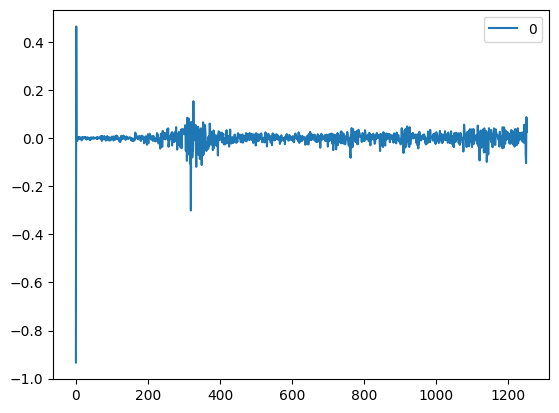

                 0
count  1252.000000
mean      0.000164
std       0.037572
min      -0.933145
25%      -0.008031
50%       0.001445
75%       0.012070
max       0.466219


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

/var/folders/26/tx2f9zfx3qsggh9l7bch3ysh0000gn/T/ipykernel_26285/378032249.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



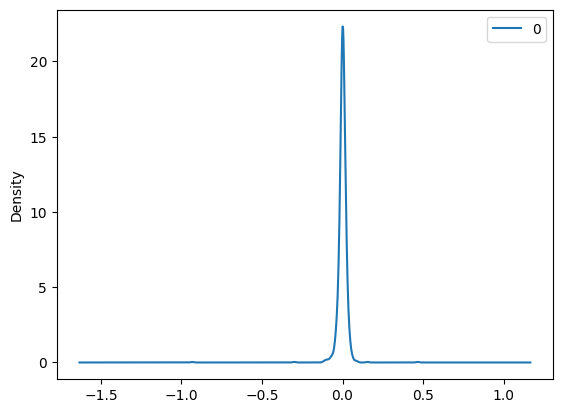

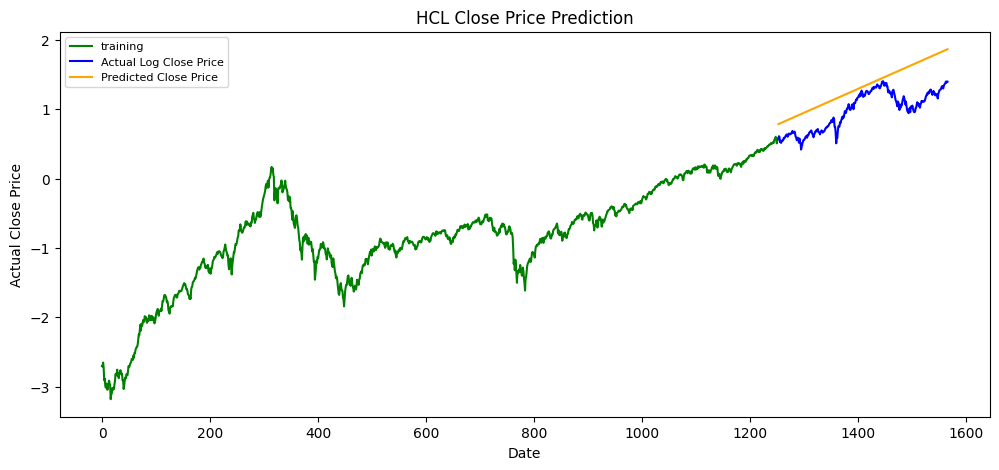

                 0
count  1252.000000
mean      0.000164
std       0.037572
min      -0.933145
25%      -0.008031
50%       0.001445
75%       0.012070
max       0.466219


/var/folders/26/tx2f9zfx3qsggh9l7bch3ysh0000gn/T/ipykernel_26285/378032249.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



MSE: 0.14980305925901172
MAE: 0.14980305925901172
RMSE: 0.3870440017091231
MAPE: 0.391651982985029


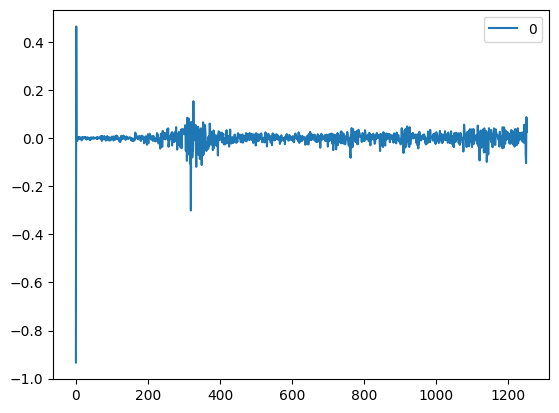

In [90]:
#nasdaq
model = ARIMA(nasdaq_train['Close'], order=(2,2,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE. 
        ##add the seasonal orders too!!

results = model.fit() 
print(results.summary())

nasdaq_df['Predicted Close'] = results.predict(start=nasdaq_train.index[0], end=nasdaq_train.index[-1], typ='levels')

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #lineplot of the residual errors, suggesting that they still be some trend information not captured by the model?
plt.show()
residuals.plot(kind='kde') #density plotof the residual error values
print(residuals.describe())
fc = results.forecast(314, alpha=0.05)
nasdaq_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(nasdaq_train['Log Close'], color='green',label='training')
plt.plot(nasdaq_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(nasdaq_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('HCL Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Actual Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot()
print(residuals.describe())
nasdaq_test['Residual'] = nasdaq_test['Log Close'].iloc[2:] - nasdaq_test['Log Close'].iloc[2:]


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=nasdaq_test.index, y=nasdaq_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=nasdaq_test.index, y=nasdaq_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for nasdaq',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(nasdaq_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(nasdaq_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(nasdaq_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-nasdaq_test['Log Close'])/np.abs(nasdaq_test['Log Close']))
print('MAPE: '+str(mape))

Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.18366182641826
p-value : 2.217139474799713e-15
#Number of Lags Used : 20
Number of Observations Used : 1411
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -15.610073633649895
p-value : 1.7844143627590354e-28
#Number of Lags Used : 22
Number of Observations Used : 1408
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.49233526452458
p-value : 0.00020300667213458534
#Number of Lags Used : 22
Number of Observations Used : 1356
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -8.391713097585438
p-value : 2.3569570870810304e-13
#Number of Lags Used : 20
Number of Observations Used : 1357
Reject the null hypothesis. Data has no unit root and is stationary.
selection of p
selection of q


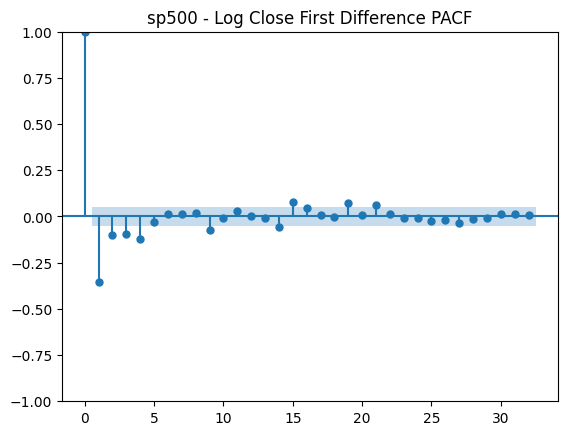

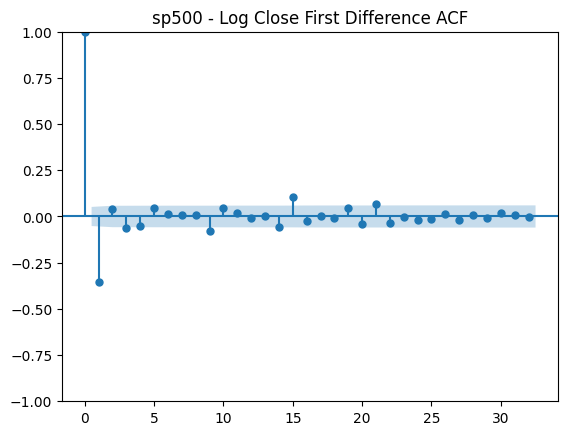

In [91]:
#indagine di p e q per sp500
sp500_df['Log Close First Difference'] = sp500_df['Log Close']- sp500_df['Log Close'].shift(1)
adf_check(sp500_df['Log Close First Difference'].dropna())

sp500_df['Log Close Second Difference'] = sp500_df['Log Close First Difference']- sp500_df['Log Close First Difference'].shift(1)
adf_check(sp500_df['Log Close Second Difference'].dropna())

sp500_df['Log Seasonal Difference'] = sp500_df['Log Close'] - sp500_df['Log Close'].shift(54) #verificaredi avere 54 settimane per anno nei dataset
adf_check(sp500_df['Log Seasonal Difference'].dropna())

sp500_df['Seasonal First Difference'] = sp500_df['Log Close First Difference'] - sp500_df['Log Close First Difference'].shift(54)
adf_check(sp500_df['Seasonal First Difference'].dropna())

    #Plots the autocorrelation function (ACF) for the first differenced data and the seasonal first differenced data: 
    #ACF plots are needed to select q parameters, while PACF are useful to get p

print('selection of p')
fig_first = plot_pacf(sp500_df['Log Close First Difference'].dropna(), title='sp500 - Log Close First Difference PACF')

print('selection of q')
second_first = plot_acf(sp500_df['Log Close First Difference'].dropna(), title='sp500 - Log Close First Difference ACF')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(4, 1, 1)   Log Likelihood                2763.461
Date:                Tue, 09 Apr 2024   AIC                          -5514.922
Time:                        22:56:07   BIC                          -5484.132
Sample:                    03-06-1994   HQIC                         -5503.347
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0432      0.860     -0.050      0.960      -1.729       1.642
ar.L2          0.0225      0.076      0.295      0.768      -0.127       0.172
ar.L3         -0.0371      0.025     -1.466      0.1

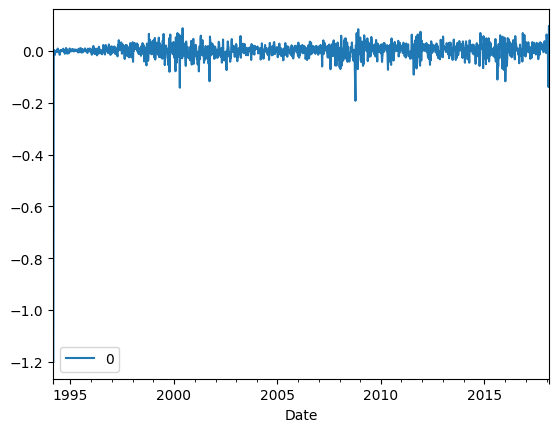

                 0
count  1252.000000
mean      0.000937
std       0.043099
min      -1.200693
25%      -0.011351
50%       0.003092
75%       0.016506
max       0.097334


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

/var/folders/26/tx2f9zfx3qsggh9l7bch3ysh0000gn/T/ipykernel_26285/1423589083.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



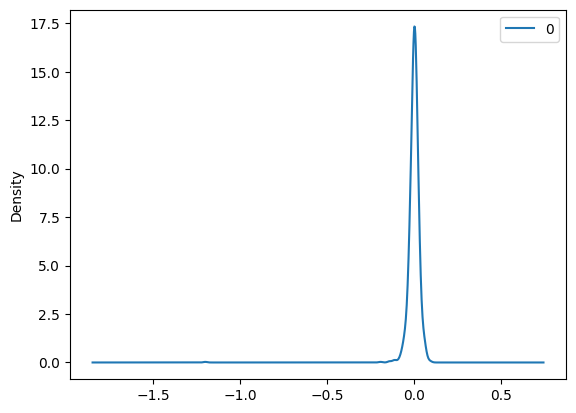

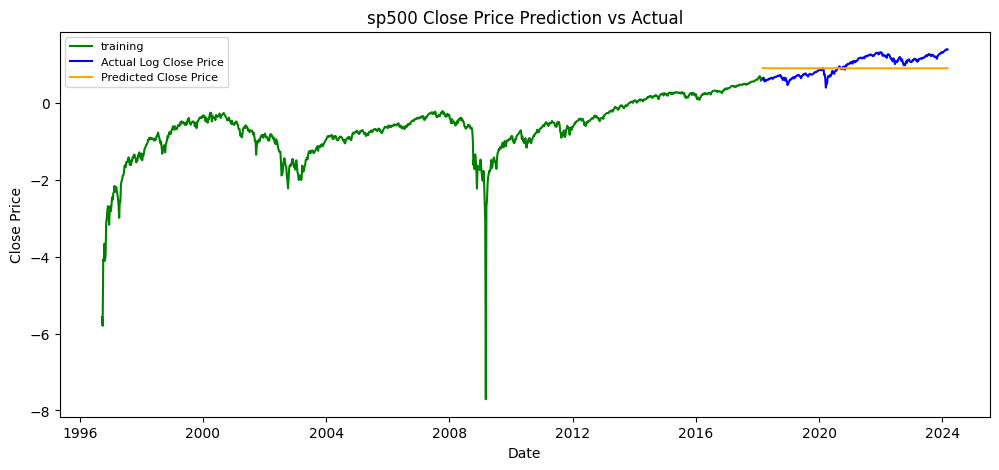

MSE: 0.06716249450931541
MAE: 0.06716249450931541
RMSE: 0.25915727755422074
MAPE: 0.2545600088192652


In [108]:
#sp500
model = ARIMA(sp500_train['Close'], order=(4,1,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE. 
        ##add the seasonal orders too!!

results = model.fit() 
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #lineplot of the residual errors, suggesting that they still be some trend information not captured by the model?
plt.show()
residuals.plot(kind='kde') #density plotof the residual error values
print(residuals.describe())

#forecast
fc = results.forecast(314, alpha=0.05)
sp500_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(sp500_train['Log Close'], color='green',label='training')
plt.plot(sp500_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(sp500_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('sp500 Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=sp500_test.index, y=sp500_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=sp500_test.index, y=sp500_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for sp500',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(sp500_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(sp500_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(sp500_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-sp500_test['Log Close'])/np.abs(sp500_test['Log Close']))
print('MAPE: '+str(mape))

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.973303509547606
p-value : 2.7443297059048737e-12
#Number of Lags Used : 22
Number of Observations Used : 1542
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -16.774528101993653
p-value : 1.2788901131950168e-29
#Number of Lags Used : 20
Number of Observations Used : 1543
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.481194149413073
p-value : 0.008483409254403851
#Number of Lags Used : 24
Number of Observations Used : 1487
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -8.494046127137663
p-value : 1.2902069061649402e-13
#Number of Lags Used : 24
Number of Observations Used : 1486
Reject the null hypothesis. Data has no unit root and is stationary.
selection of p
selection of q


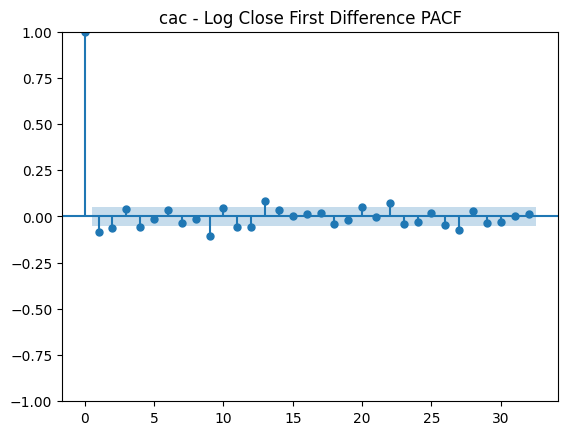

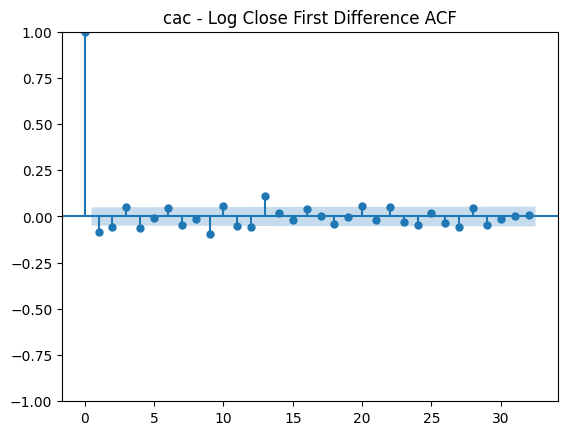

In [93]:
#indagine di p e q per cac
cac_df['Log Close First Difference'] = cac_df['Log Close']- cac_df['Log Close'].shift(1)
adf_check(cac_df['Log Close First Difference'].dropna())

cac_df['Log Close Second Difference'] = cac_df['Log Close First Difference']- cac_df['Log Close First Difference'].shift(1)
adf_check(cac_df['Log Close Second Difference'].dropna())

cac_df['Log Seasonal Difference'] = cac_df['Log Close'] - cac_df['Log Close'].shift(54) #verificaredi avere 54 settimane per anno nei dataset
adf_check(cac_df['Log Seasonal Difference'].dropna())

cac_df['Seasonal First Difference'] = cac_df['Log Close First Difference'] - cac_df['Log Close First Difference'].shift(54)
adf_check(cac_df['Seasonal First Difference'].dropna())

    #Plots the autocorrelation function (ACF) for the first differenced data and the seasonal first differenced data: 
    #ACF plots are needed to select q parameters, while PACF are useful to get p

print('selection of p')
fig_first = plot_pacf(cac_df['Log Close First Difference'].dropna(), title='cac - Log Close First Difference PACF')

print('selection of q')
second_first = plot_acf(cac_df['Log Close First Difference'].dropna(), title='cac - Log Close First Difference ACF')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1327.555
Date:                Tue, 09 Apr 2024   AIC                          -2649.111
Time:                        22:57:48   BIC                          -2633.715
Sample:                    03-06-1994   HQIC                         -2643.323
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1421      0.358      0.397      0.691      -0.559       0.844
ma.L1         -0.2012      0.349     -0.576      0.565      -0.886       0.483
sigma2         0.0070      0.000     44.240      0.0

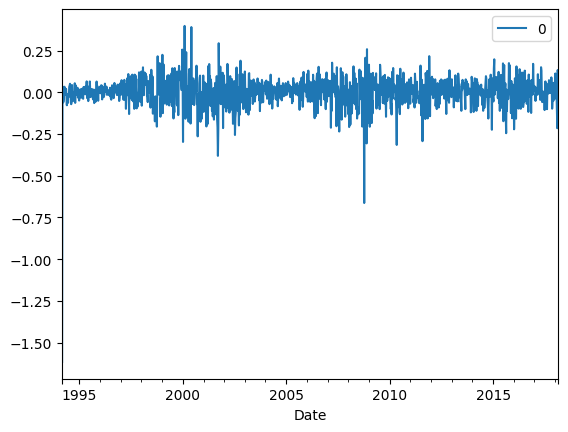

                 0
count  1252.000000
mean      0.000667
std       0.095379
min      -1.615668
25%      -0.042501
50%       0.008687
75%       0.052104
max       0.398071


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

/var/folders/26/tx2f9zfx3qsggh9l7bch3ysh0000gn/T/ipykernel_26285/1672595675.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



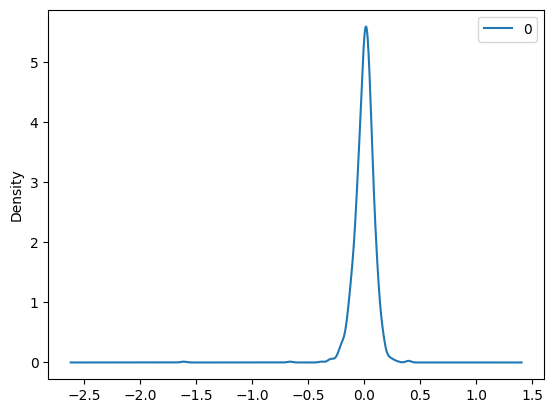

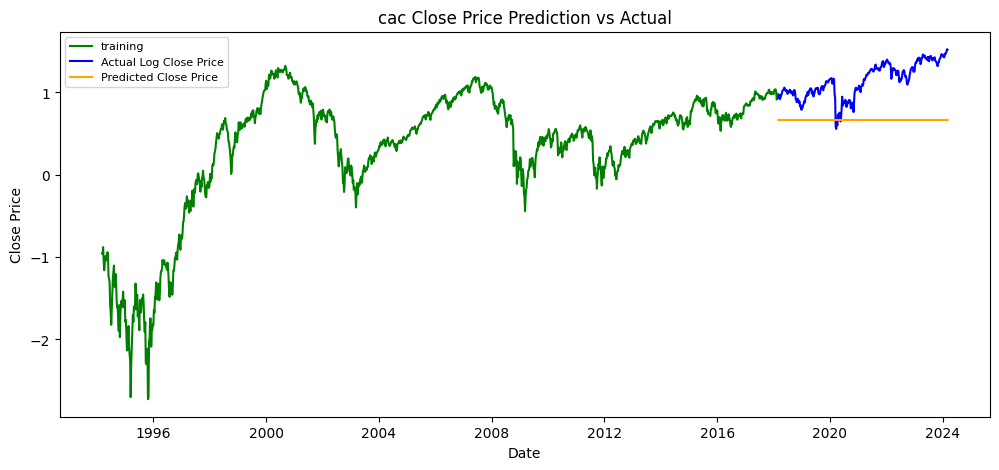

MSE: 0.270691685688403
MAE: 0.270691685688403
RMSE: 0.5202803914125566
MAPE: 0.39779637120254574


In [109]:
#cac
model = ARIMA(cac_train['Close'], order=(1,1,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE. 
        ##add the seasonal orders too!!

results = model.fit() 
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #lineplot of the residual errors, suggesting that they still be some trend information not captured by the model?
plt.show()
residuals.plot(kind='kde') #density plotof the residual error values
print(residuals.describe())
fc = results.forecast(314, alpha=0.05)
cac_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(cac_train['Log Close'], color='green',label='training')
plt.plot(cac_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(cac_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('cac Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=cac_test.index, y=cac_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=cac_test.index, y=cac_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for Cac',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(cac_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(cac_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(cac_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-cac_test['Log Close'])/np.abs(cac_test['Log Close']))
print('MAPE: '+str(mape))

In [ ]:
STOP

NameError: name 'STOP' is not defined

#SYSTEMATIC TRAINING MODEL
- Considering VIX
- if MA10>MA50 --> Output 1
- if MA50>MA -->

In [ ]:
#SYSTEMATIC TRAINING MODEL


In [ ]:
##example of fuzzy logic
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Define fuzzy membership functions
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['medium'] = fuzz.trimf(temperature.universe, [0, 50, 100])
temperature['high'] = fuzz.trimf(temperature.universe, [50, 100, 100])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [0, 50, 100])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['low'] | humidity['low'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['medium'] | humidity['medium'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['high'] | humidity['high'], fan_speed['high'])
#RNN HERE
# Define control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan_speed_ctrl = ctrl.ControlSystemSimulation(fan_ctrl)

# Pass inputs to the control system
fan_speed_ctrl.input['temperature'] = 10
fan_speed_ctrl.input['humidity'] = 80

# Compute the output
fan_speed_ctrl.compute()

# Print the output
print("Fan Speed:", fan_speed_ctrl.output['fan_speed'])


Fan Speed: 47.61006289308178


## ANFIS 

prova 